In [5]:
import numpy as np 
import yaml
import os 
import analyzer
import matplotlib.pyplot as plt

In [6]:
# Loading CSV file for mRNA seq data
def csvread(name):
    dataraw = open(name+'.csv','r')
    
    # Empty dictionary for each column
    data_xyr = {}
    counter = 0
    name = ['count','x','y','r']
    for j in np.arange(4):
        data_xyr[name[j]] = []
        
    for line in dataraw:
        if line.strip():
            line = line.strip("\n' '")
            line = line.split(",")
            # Storing the data in the dictionary 
            for i in np.arange(4):
                element = line[i]
                data_xyr[name[i]].append(element)

    return data_xyr


# Loading CSV file for mRNA seq data
def csvread2(name):
    dataraw = open(name+'.csv','r')
    
    # Empty dictionary for each column
    data_rmsd = {}
    counter = 0
    name = ['frame','rmsd']
    for j in np.arange(2):
        data_rmsd[name[j]] = []
        
    for line in dataraw:
        if line.strip():
            line = line.strip("\n' '")
            line = line.split(",")
            # Storing the data in the dictionary 
            for i in np.arange(2):
                element = line[i]
                data_rmsd[name[i]].append(float(element))

    return data_rmsd

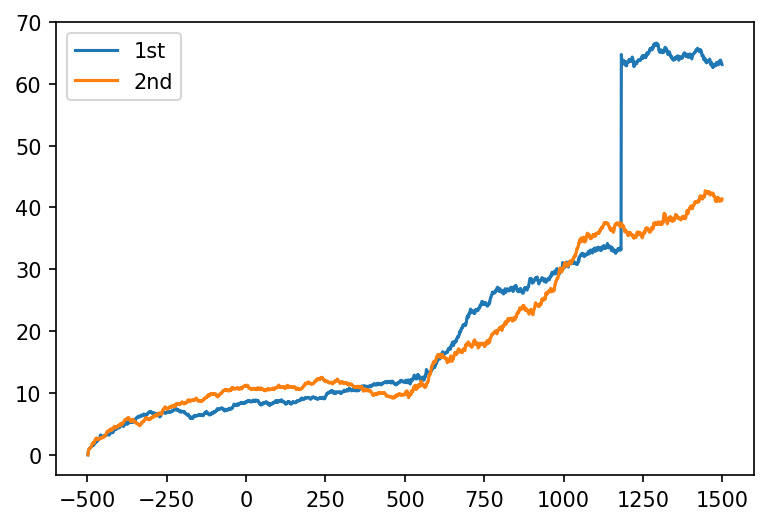

In [20]:
data1a = csvread2('rmsd_r1_1')
data1b = csvread2('rmsd_r2_1')


plt.figure(figsize=(6,4),dpi=150)
plt.plot(data1a['frame'],data1a['rmsd'],label = '1st')
plt.plot(data1b['frame'],data1b['rmsd'],label = '2nd')
plt.legend(loc=0)

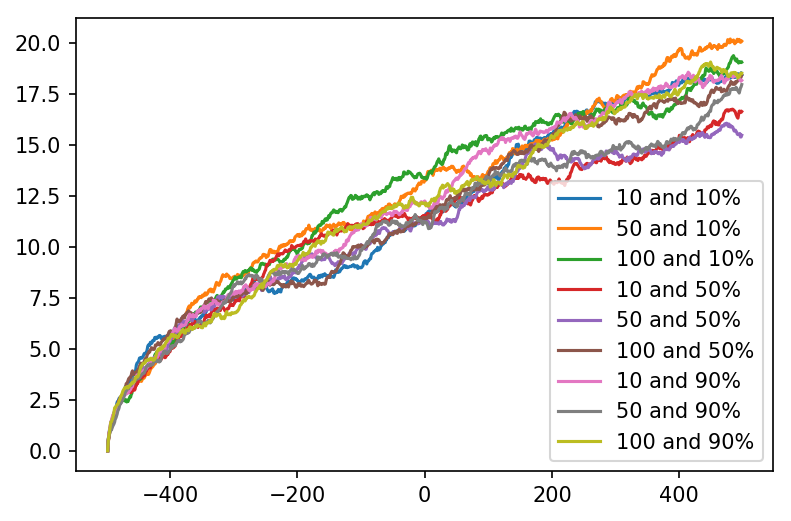

In [7]:
data1a = csvread2('rmsd_r1_1')
data1b = csvread2('rmsd_r2_1')
data2a = csvread2('rmsd_r1_2')
data2b = csvread2('rmsd_r2_2')
data3a = csvread2('rmsd_r1_3')
data3b = csvread2('rmsd_r2_3')
data4a = csvread2('rmsd_r1_4')
data4b = csvread2('rmsd_r2_4')
data5a = csvread2('rmsd_r1_5')
data5b = csvread2('rmsd_r2_5')
data6a = csvread2('rmsd_r1_6')
data6b = csvread2('rmsd_r2_6')
data7a = csvread2('rmsd_r1_7')
data7b = csvread2('rmsd_r2_7')
data8a = csvread2('rmsd_r1_8')
data8b = csvread2('rmsd_r2_8')
data9a = csvread2('rmsd_r1_9')
data9b = csvread2('rmsd_r2_9')

plt.figure(figsize=(6,4),dpi=150)
plt.plot(data1a['frame']+499,data1a['rmsd'],label = '10 and 10%')
#plt.plot(data1b['frame'],data1b['rmsd'])
plt.plot(data2a['frame'],data2a['rmsd'],label = '50 and 10%')
#plt.plot(data2b['frame'],data2b['rmsd'])
plt.plot(data3a['frame'],data3a['rmsd'],label = '100 and 10%')
#plt.plot(data3b['frame'],data3b['rmsd'])
plt.plot(data4a['frame'],data4a['rmsd'],label = '10 and 50%')
#plt.plot(data4b['frame'],data4b['rmsd'])
plt.plot(data5a['frame'],data5a['rmsd'],label = '50 and 50%')
#plt.plot(data5b['frame'],data5b['rmsd'])
plt.plot(data6a['frame'],data6a['rmsd'],label = '100 and 50%')
#plt.plot(data6b['frame'],data6b['rmsd'])
plt.plot(data7a['frame'],data7a['rmsd'],label = '10 and 90%')
#plt.plot(data7b['frame'],data7b['rmsd'])
plt.plot(data8a['frame'],data8a['rmsd'],label = '50 and 90%')
#plt.plot(data8b['frame'],data8b['rmsd'])
plt.plot(data9a['frame'],data9a['rmsd'],label = '100 and 90%')
#plt.plot(data9b['frame'],data9b['rmsd'])
plt.legend(loc=0)

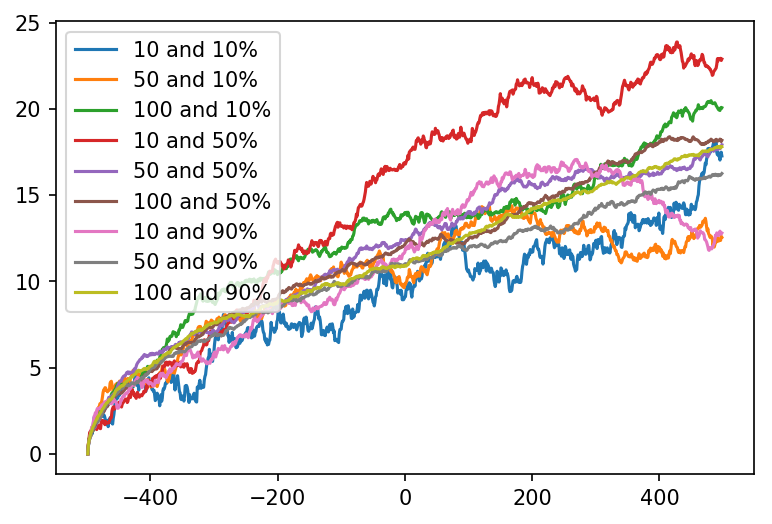

In [8]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(data1a['frame'],data1b['rmsd'],label = '10 and 10%')
plt.plot(data2a['frame'],data2b['rmsd'],label = '50 and 10%')
plt.plot(data3a['frame'],data3b['rmsd'],label = '100 and 10%')
plt.plot(data4a['frame'],data4b['rmsd'],label = '10 and 50%')
plt.plot(data5a['frame'],data5b['rmsd'],label = '50 and 50%')
plt.plot(data6a['frame'],data6b['rmsd'],label = '100 and 50%')
plt.plot(data7a['frame'],data7b['rmsd'],label = '10 and 90%')
plt.plot(data8a['frame'],data8b['rmsd'],label = '50 and 90%')
plt.plot(data9a['frame'],data9b['rmsd'],label = '100 and 90%')
plt.legend(loc=0)

In [7]:
subseries = 3
series = 9
repeat = 5
name = ['10',
        '50',
        '100']

section = ['first','second']

data_avg1 = {}
data_std1 = {}
data_sem1 = {}
data_rmsd1 = {}

data_avg2 = {}
data_std2 = {}
data_sem2 = {}
data_rmsd2 = {}

data_sortedx = {}
data_sortedy = {}
data_sortedr = {}

data_avgx = {} 
data_avgy = {} 
data_avgr = {} 

data_stdx = {} 
data_stdy = {} 
data_stdr = {}

data_semx = {} 
data_semy = {} 
data_semr = {}

for i in np.arange(subseries):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(repeat):
        data = csvread('test_r'+str(1)+'_'+str(i+1+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            if float(x[n]) < 6500:
                data_sortedx[name[i]].append(float(x[n]))
            if float(y[n]) < 3000:
                data_sortedy[name[i]].append(float(y[n]))
            if float(r[n]) < np.sqrt(9000**2 + 3000**2):
                data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    # rmsd (before and after points)
    data_rmsdx = np.sqrt(np.sum(np.asarray(data_sortedx[name[i]])**2)/num)
    data_rmsdy = np.sqrt(np.sum(np.asarray(data_sortedy[name[i]])**2)/num)
    data_rmsdr = np.sqrt(np.sum(np.asarray(data_sortedr[name[i]])**2)/num)
    
    data_avg1[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std1[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem1[name[i]] = [data_semx, data_semy, data_semr]
    data_rmsd1[name[i]] = [data_rmsdx, data_rmsdy, data_rmsdr]

data_avg1a = data_avg1
data_std1a = data_std1
data_sem1a = data_sem1
data_rmsd1a = data_rmsd1

data_sortedx1 = data_sortedx
data_sortedy1 = data_sortedy
data_sortedr1 = data_sortedr
    
for i in np.arange(subseries):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(repeat):
        data = csvread('test_r'+str(2)+'_'+str(i+1+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            if float(x[n]) < 6500:
                data_sortedx[name[i]].append(float(x[n]))
            if float(y[n]) < 3000:
                data_sortedy[name[i]].append(float(y[n]))
            if float(r[n]) < np.sqrt(9000**2 + 3000**2):
                data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    # rmsd (before and after points)
    data_rmsdx = np.sqrt(np.sum(np.asarray(data_sortedx[name[i]])**2)/num)
    data_rmsdy = np.sqrt(np.sum(np.asarray(data_sortedy[name[i]])**2)/num)
    data_rmsdr = np.sqrt(np.sum(np.asarray(data_sortedr[name[i]])**2)/num)
    
    data_avg2[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std2[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem2[name[i]] = [data_semx, data_semy, data_semr]
    data_rmsd2[name[i]] = [data_rmsdx, data_rmsdy, data_rmsdr]

data_avg2a = data_avg2
data_std2a = data_std2
data_sem2a = data_sem2
data_rmsd2a = data_rmsd2
    
data_sortedx2 = data_sortedx
data_sortedy2 = data_sortedy
data_sortedr2 = data_sortedr
    

In [8]:
subseries = 3
series = 9
repeat = 5
name = ['10',
        '50',
        '100']

section = ['first','second']

data_avg1 = {}
data_std1 = {}
data_sem1 = {}
data_rmsd1 = {}

data_avg2 = {}
data_std2 = {}
data_sem2 = {}
data_rmsd2 = {}

data_sortedx = {}
data_sortedy = {}
data_sortedr = {}

data_avgx = {} 
data_avgy = {} 
data_avgr = {} 

data_stdx = {} 
data_stdy = {} 
data_stdr = {}

data_semx = {} 
data_semy = {} 
data_semr = {}

for i in np.arange(subseries):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(repeat):
        data = csvread('test_r'+str(1)+'_'+str(i+4+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            if float(x[n]) < 6500:
                data_sortedx[name[i]].append(float(x[n]))
            if float(y[n]) < 3000:
                data_sortedy[name[i]].append(float(y[n]))
            if float(r[n]) < np.sqrt(9000**2 + 3000**2):
                data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    # rmsd (before and after points)
    data_rmsdx = np.sqrt(np.sum(np.asarray(data_sortedx[name[i]])**2)/num)
    data_rmsdy = np.sqrt(np.sum(np.asarray(data_sortedy[name[i]])**2)/num)
    data_rmsdr = np.sqrt(np.sum(np.asarray(data_sortedr[name[i]])**2)/num)
    
    data_avg1[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std1[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem1[name[i]] = [data_semx, data_semy, data_semr]
    data_rmsd1[name[i]] = [data_rmsdx, data_rmsdy, data_rmsdr]

data_avg1b = data_avg1
data_std1b = data_std1
data_sem1b = data_sem1
data_rmsd1b = data_rmsd1

data_sortedx1 = data_sortedx
data_sortedy1 = data_sortedy
data_sortedr1 = data_sortedr
    
for i in np.arange(subseries):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(repeat):
        data = csvread('test_r'+str(2)+'_'+str(i+4+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            if float(x[n]) < 6500:
                data_sortedx[name[i]].append(float(x[n]))
            if float(y[n]) < 3000:
                data_sortedy[name[i]].append(float(y[n]))
            if float(r[n]) < np.sqrt(9000**2 + 3000**2):
                data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    # rmsd (before and after points)
    data_rmsdx = np.sqrt(np.sum(np.asarray(data_sortedx[name[i]])**2)/num)
    data_rmsdy = np.sqrt(np.sum(np.asarray(data_sortedy[name[i]])**2)/num)
    data_rmsdr = np.sqrt(np.sum(np.asarray(data_sortedr[name[i]])**2)/num)
    
    data_avg2[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std2[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem2[name[i]] = [data_semx, data_semy, data_semr]
    data_rmsd2[name[i]] = [data_rmsdx, data_rmsdy, data_rmsdr]

data_avg2b = data_avg2
data_std2b = data_std2
data_sem2b = data_sem2
data_rmsd2b = data_rmsd2
    
data_sortedx2 = data_sortedx
data_sortedy2 = data_sortedy
data_sortedr2 = data_sortedr
    

In [10]:
subseries = 3
series = 9
repeat = 5
name = ['10',
        '50',
        '100']

section = ['first','second']

data_avg1 = {}
data_std1 = {}
data_sem1 = {}
data_rmsd1 = {}

data_avg2 = {}
data_std2 = {}
data_sem2 = {}
data_rmsd2 = {}

data_sortedx = {}
data_sortedy = {}
data_sortedr = {}

data_avgx = {} 
data_avgy = {} 
data_avgr = {} 

data_stdx = {} 
data_stdy = {} 
data_stdr = {}

data_semx = {} 
data_semy = {} 
data_semr = {}

for i in np.arange(subseries):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(repeat):
        data = csvread('test_r'+str(1)+'_'+str(i+7+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            if float(x[n]) < 6500:
                data_sortedx[name[i]].append(float(x[n]))
            if float(y[n]) < 3000:
                data_sortedy[name[i]].append(float(y[n]))
            if float(r[n]) < np.sqrt(9000**2 + 3000**2):
                data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    # rmsd (before and after points)
    data_rmsdx = np.sqrt(np.sum(np.asarray(data_sortedx[name[i]])**2)/num)
    data_rmsdy = np.sqrt(np.sum(np.asarray(data_sortedy[name[i]])**2)/num)
    data_rmsdr = np.sqrt(np.sum(np.asarray(data_sortedr[name[i]])**2)/num)
    
    data_avg1[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std1[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem1[name[i]] = [data_semx, data_semy, data_semr]
    data_rmsd1[name[i]] = [data_rmsdx, data_rmsdy, data_rmsdr]

data_avg1c = data_avg1
data_std1c = data_std1
data_sem1c = data_sem1
data_rmsd1c = data_rmsd1

data_sortedx1 = data_sortedx
data_sortedy1 = data_sortedy
data_sortedr1 = data_sortedr
    
for i in np.arange(subseries):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(repeat):
        data = csvread('test_r'+str(2)+'_'+str(i+7+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            if float(x[n]) < 6500:
                data_sortedx[name[i]].append(float(x[n]))
            if float(y[n]) < 3000:
                data_sortedy[name[i]].append(float(y[n]))
            if float(r[n]) < np.sqrt(9000**2 + 3000**2):
                data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    # rmsd (before and after points)
    data_rmsdx = np.sqrt(np.sum(np.asarray(data_sortedx[name[i]])**2)/num)
    data_rmsdy = np.sqrt(np.sum(np.asarray(data_sortedy[name[i]])**2)/num)
    data_rmsdr = np.sqrt(np.sum(np.asarray(data_sortedr[name[i]])**2)/num)
    
    data_avg2[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std2[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem2[name[i]] = [data_semx, data_semy, data_semr]
    data_rmsd2[name[i]] = [data_rmsdx, data_rmsdy, data_rmsdr]

data_avg2c = data_avg2
data_std2c = data_std2
data_sem2c = data_sem2
data_rmsd2c = data_rmsd2
    
data_sortedx2 = data_sortedx
data_sortedy2 = data_sortedy
data_sortedr2 = data_sortedr
    

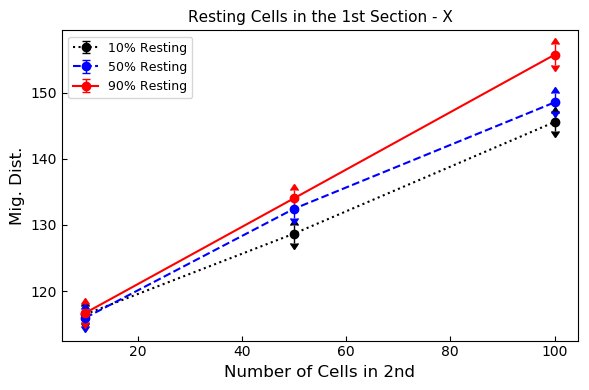

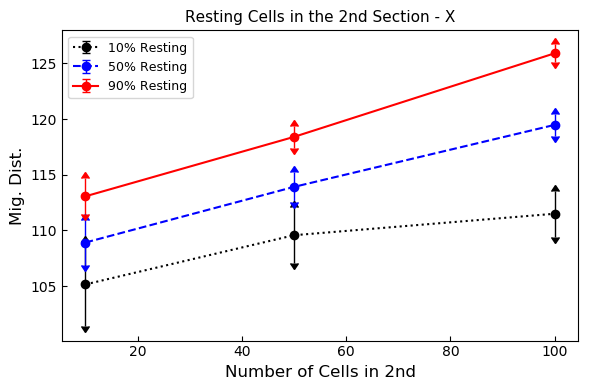

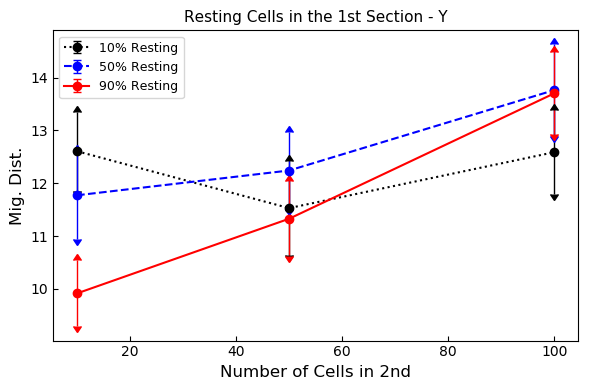

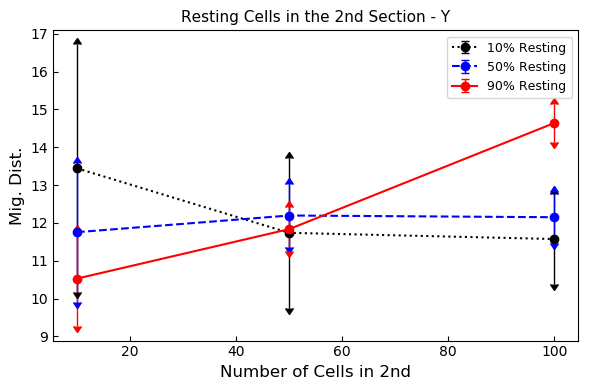

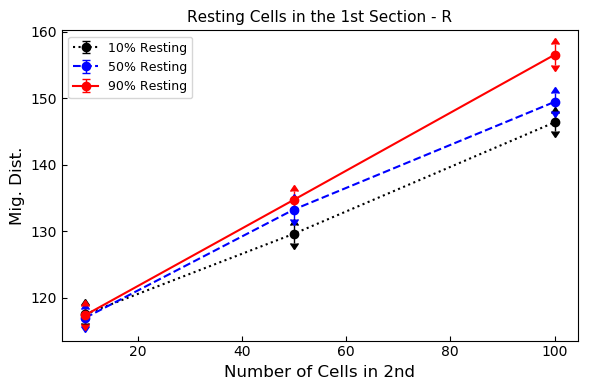

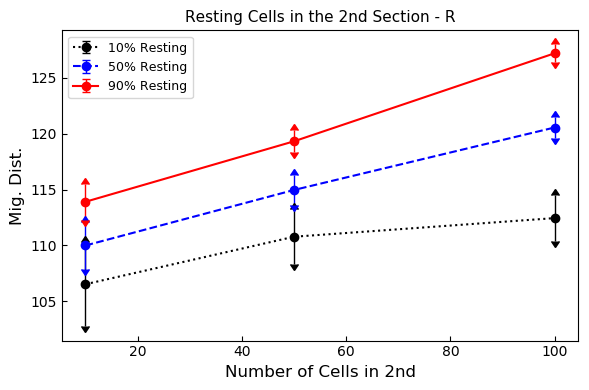

In [11]:
x = [int(10), int(50), int(100)]
y1xa = [data_avg1a[name[0]][0],data_avg1a[name[1]][0],data_avg1a[name[2]][0]]
y1ya = [data_avg1a[name[0]][1],data_avg1a[name[1]][1],data_avg1a[name[2]][1]]
y1ra = [data_avg1a[name[0]][2],data_avg1a[name[1]][2],data_avg1a[name[2]][2]]

y2xa = [data_avg2a[name[0]][0],data_avg2a[name[1]][0],data_avg2a[name[2]][0]]
y2ya = [data_avg2a[name[0]][1],data_avg2a[name[1]][1],data_avg2a[name[2]][1]]
y2ra = [data_avg2a[name[0]][2],data_avg2a[name[1]][2],data_avg2a[name[2]][2]]

y1xb = [data_avg1b[name[0]][0],data_avg1b[name[1]][0],data_avg1b[name[2]][0]]
y1yb = [data_avg1b[name[0]][1],data_avg1b[name[1]][1],data_avg1b[name[2]][1]]
y1rb = [data_avg1b[name[0]][2],data_avg1b[name[1]][2],data_avg1b[name[2]][2]]

y2xb = [data_avg2b[name[0]][0],data_avg2b[name[1]][0],data_avg2b[name[2]][0]]
y2yb = [data_avg2b[name[0]][1],data_avg2b[name[1]][1],data_avg2b[name[2]][1]]
y2rb = [data_avg2b[name[0]][2],data_avg2b[name[1]][2],data_avg2b[name[2]][2]]

y1xc = [data_avg1c[name[0]][0],data_avg1c[name[1]][0],data_avg1c[name[2]][0]]
y1yc = [data_avg1c[name[0]][1],data_avg1c[name[1]][1],data_avg1c[name[2]][1]]
y1rc = [data_avg1c[name[0]][2],data_avg1c[name[1]][2],data_avg1c[name[2]][2]]

y2xc = [data_avg2c[name[0]][0],data_avg2c[name[1]][0],data_avg2c[name[2]][0]]
y2yc = [data_avg2c[name[0]][1],data_avg2c[name[1]][1],data_avg2c[name[2]][1]]
y2rc = [data_avg2c[name[0]][2],data_avg2c[name[1]][2],data_avg2c[name[2]][2]]

y1xae = [data_sem1a[name[0]][0],data_sem1a[name[1]][0],data_sem1a[name[2]][0]]
y1yae = [data_sem1a[name[0]][1],data_sem1a[name[1]][1],data_sem1a[name[2]][1]]
y1rae = [data_sem1a[name[0]][2],data_sem1a[name[1]][2],data_sem1a[name[2]][2]]

y2xae = [data_sem2a[name[0]][0],data_sem2a[name[1]][0],data_sem2a[name[2]][0]]
y2yae = [data_sem2a[name[0]][1],data_sem2a[name[1]][1],data_sem2a[name[2]][1]]
y2rae = [data_sem2a[name[0]][2],data_sem2a[name[1]][2],data_sem2a[name[2]][2]]

y1xbe = [data_sem1b[name[0]][0],data_sem1b[name[1]][0],data_sem1b[name[2]][0]]
y1ybe = [data_sem1b[name[0]][1],data_sem1b[name[1]][1],data_sem1b[name[2]][1]]
y1rbe = [data_sem1b[name[0]][2],data_sem1b[name[1]][2],data_sem1b[name[2]][2]]

y2xbe = [data_sem2b[name[0]][0],data_sem2b[name[1]][0],data_sem2b[name[2]][0]]
y2ybe = [data_sem2b[name[0]][1],data_sem2b[name[1]][1],data_sem2b[name[2]][1]]
y2rbe = [data_sem2b[name[0]][2],data_sem2b[name[1]][2],data_sem2b[name[2]][2]]

y1xce = [data_sem1c[name[0]][0],data_sem1c[name[1]][0],data_sem1c[name[2]][0]]
y1yce = [data_sem1c[name[0]][1],data_sem1c[name[1]][1],data_sem1c[name[2]][1]]
y1rce = [data_sem1c[name[0]][2],data_sem1c[name[1]][2],data_sem1c[name[2]][2]]

y2xce = [data_sem2c[name[0]][0],data_sem2c[name[1]][0],data_sem2c[name[2]][0]]
y2yce = [data_sem2c[name[0]][1],data_sem2c[name[1]][1],data_sem2c[name[2]][1]]
y2rce = [data_sem2c[name[0]][2],data_sem2c[name[1]][2],data_sem2c[name[2]][2]]

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Resting Cells in the 1st Section - X',fontsize=11)
plt.errorbar(x, y1xa, yerr=y1xae, fmt=':ok', mew=1, uplims=True, lolims=True, capthick=10, ecolor='black', elinewidth=1, label='10% Resting')
plt.errorbar(x, y1xb, yerr=y1xbe, fmt='--ob', mew=1, uplims=True, lolims=True, capthick=10, ecolor='blue', elinewidth=1, label='50% Resting')
plt.errorbar(x, y1xc, yerr=y1xce, fmt='-or', mew=1, uplims=True, lolims=True, capthick=10, ecolor='red', elinewidth=1, label='90% Resting')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
#plt.ylim([75,475])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Resting Cells in the 2nd Section - X',fontsize=11)
plt.errorbar(x, y2xa, yerr=y2xae, fmt=':ok', mew=1, uplims=True, lolims=True, capthick=10, ecolor='black', elinewidth=1, label='10% Resting')
plt.errorbar(x, y2xb, yerr=y2xbe, fmt='--ob', mew=1, uplims=True, lolims=True, capthick=10, ecolor='blue', elinewidth=1, label='50% Resting')
plt.errorbar(x, y2xc, yerr=y2xce, fmt='-or', mew=1, uplims=True, lolims=True, capthick=10, ecolor='red', elinewidth=1, label='90% Resting')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
#plt.ylim([255,4775])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Resting Cells in the 1st Section - Y',fontsize=11)
plt.errorbar(x, y1ya, yerr=y1yae, fmt=':ok', mew=1, uplims=True, lolims=True, capthick=10, ecolor='black', elinewidth=1, label='10% Resting')
plt.errorbar(x, y1yb, yerr=y1ybe, fmt='--ob', mew=1, uplims=True, lolims=True, capthick=10, ecolor='blue', elinewidth=1, label='50% Resting')
plt.errorbar(x, y1yc, yerr=y1yce, fmt='-or', mew=1, uplims=True, lolims=True, capthick=10, ecolor='red', elinewidth=1, label='90% Resting')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
#plt.ylim([75,475])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Resting Cells in the 2nd Section - Y',fontsize=11)
plt.errorbar(x, y2ya, yerr=y2yae, fmt=':ok', mew=1, uplims=True, lolims=True, capthick=10, ecolor='black', elinewidth=1, label='10% Resting')
plt.errorbar(x, y2yb, yerr=y2ybe, fmt='--ob', mew=1, uplims=True, lolims=True, capthick=10, ecolor='blue', elinewidth=1, label='50% Resting')
plt.errorbar(x, y2yc, yerr=y2yce, fmt='-or', mew=1, uplims=True, lolims=True, capthick=10, ecolor='red', elinewidth=1, label='90% Resting')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
#plt.ylim([255,4775])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Resting Cells in the 1st Section - R',fontsize=11)
plt.errorbar(x, y1ra, yerr=y1rae, fmt=':ok', mew=1, uplims=True, lolims=True, capthick=10, ecolor='black', elinewidth=1, label='10% Resting')
plt.errorbar(x, y1rb, yerr=y1rbe, fmt='--ob', mew=1, uplims=True, lolims=True, capthick=10, ecolor='blue', elinewidth=1, label='50% Resting')
plt.errorbar(x, y1rc, yerr=y1rce, fmt='-or', mew=1, uplims=True, lolims=True, capthick=10, ecolor='red', elinewidth=1, label='90% Resting')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
#plt.ylim([0,700])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Resting Cells in the 2nd Section - R',fontsize=11)
plt.errorbar(x, y2ra, yerr=y2rae, fmt=':ok', mew=1, uplims=True, lolims=True, capthick=10, ecolor='black', elinewidth=1, label='10% Resting')
plt.errorbar(x, y2rb, yerr=y2rbe, fmt='--ob', mew=1, uplims=True, lolims=True, capthick=10, ecolor='blue', elinewidth=1, label='50% Resting')
plt.errorbar(x, y2rc, yerr=y2rce, fmt='-or', mew=1, uplims=True, lolims=True, capthick=10, ecolor='red', elinewidth=1, label='90% Resting')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
#plt.ylim([655,4775])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

In [22]:
subseries = 3
series = 9
repeat = 5
name = ['10',
        '50',
        '100']

section = ['first','second']

data_avg1 = {}
data_std1 = {}
data_sem1 = {}
data_rmsd1 = {}

data_avg2 = {}
data_std2 = {}
data_sem2 = {}
data_rmsd2 = {}

data_sortedx = {}
data_sortedy = {}
data_sortedr = {}

data_avgx = {} 
data_avgy = {} 
data_avgr = {} 

data_stdx = {} 
data_stdy = {} 
data_stdr = {}

data_semx = {} 
data_semy = {} 
data_semr = {}

for i in np.arange(subseries):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(repeat):
        data = csvread('test_a'+str(1)+'_'+str(i+1+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            if float(x[n]) < 6500:
                data_sortedx[name[i]].append(float(x[n]))
            if float(y[n]) < 3000:
                data_sortedy[name[i]].append(float(y[n]))
            if float(r[n]) < np.sqrt(9000**2 + 3000**2):
                data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    # rmsd (before and after points)
    data_rmsdx = np.sqrt(np.sum(np.asarray(data_sortedx[name[i]])**2)/num)
    data_rmsdy = np.sqrt(np.sum(np.asarray(data_sortedy[name[i]])**2)/num)
    data_rmsdr = np.sqrt(np.sum(np.asarray(data_sortedr[name[i]])**2)/num)
    
    data_avg1[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std1[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem1[name[i]] = [data_semx, data_semy, data_semr]
    data_rmsd1[name[i]] = [data_rmsdx, data_rmsdy, data_rmsdr]

data_avg1a = data_avg1
data_std1a = data_std1
data_sem1a = data_sem1
data_rmsd1a = data_rmsd1

data_sortedx1 = data_sortedx
data_sortedy1 = data_sortedy
data_sortedr1 = data_sortedr
    
for i in np.arange(subseries):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(repeat):
        data = csvread('test_a'+str(2)+'_'+str(i+1+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            if float(x[n]) < 6500:
                data_sortedx[name[i]].append(float(x[n]))
            if float(y[n]) < 3000:
                data_sortedy[name[i]].append(float(y[n]))
            if float(r[n]) < np.sqrt(9000**2 + 3000**2):
                data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    # rmsd (before and after points)
    data_rmsdx = np.sqrt(np.sum(np.asarray(data_sortedx[name[i]])**2)/num)
    data_rmsdy = np.sqrt(np.sum(np.asarray(data_sortedy[name[i]])**2)/num)
    data_rmsdr = np.sqrt(np.sum(np.asarray(data_sortedr[name[i]])**2)/num)
    
    data_avg2[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std2[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem2[name[i]] = [data_semx, data_semy, data_semr]
    data_rmsd2[name[i]] = [data_rmsdx, data_rmsdy, data_rmsdr]

data_avg2a = data_avg2
data_std2a = data_std2
data_sem2a = data_sem2
data_rmsd2a = data_rmsd2
    
data_sortedx2 = data_sortedx
data_sortedy2 = data_sortedy
data_sortedr2 = data_sortedr
    

In [23]:
subseries = 3
series = 9
repeat = 5
name = ['10',
        '50',
        '100']

section = ['first','second']

data_avg1 = {}
data_std1 = {}
data_sem1 = {}
data_rmsd1 = {}

data_avg2 = {}
data_std2 = {}
data_sem2 = {}
data_rmsd2 = {}

data_sortedx = {}
data_sortedy = {}
data_sortedr = {}

data_avgx = {} 
data_avgy = {} 
data_avgr = {} 

data_stdx = {} 
data_stdy = {} 
data_stdr = {}

data_semx = {} 
data_semy = {} 
data_semr = {}

for i in np.arange(subseries):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(repeat):
        data = csvread('test_a'+str(1)+'_'+str(i+4+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            if float(x[n]) < 6500:
                data_sortedx[name[i]].append(float(x[n]))
            if float(y[n]) < 3000:
                data_sortedy[name[i]].append(float(y[n]))
            if float(r[n]) < np.sqrt(9000**2 + 3000**2):
                data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    # rmsd (before and after points)
    data_rmsdx = np.sqrt(np.sum(np.asarray(data_sortedx[name[i]])**2)/num)
    data_rmsdy = np.sqrt(np.sum(np.asarray(data_sortedy[name[i]])**2)/num)
    data_rmsdr = np.sqrt(np.sum(np.asarray(data_sortedr[name[i]])**2)/num)
    
    data_avg1[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std1[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem1[name[i]] = [data_semx, data_semy, data_semr]
    data_rmsd1[name[i]] = [data_rmsdx, data_rmsdy, data_rmsdr]

data_avg1b = data_avg1
data_std1b = data_std1
data_sem1b = data_sem1
data_rmsd1b = data_rmsd1

data_sortedx1 = data_sortedx
data_sortedy1 = data_sortedy
data_sortedr1 = data_sortedr
    
for i in np.arange(subseries):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(repeat):
        data = csvread('test_a'+str(2)+'_'+str(i+4+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            if float(x[n]) < 6500:
                data_sortedx[name[i]].append(float(x[n]))
            if float(y[n]) < 3000:
                data_sortedy[name[i]].append(float(y[n]))
            if float(r[n]) < np.sqrt(9000**2 + 3000**2):
                data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    # rmsd (before and after points)
    data_rmsdx = np.sqrt(np.sum(np.asarray(data_sortedx[name[i]])**2)/num)
    data_rmsdy = np.sqrt(np.sum(np.asarray(data_sortedy[name[i]])**2)/num)
    data_rmsdr = np.sqrt(np.sum(np.asarray(data_sortedr[name[i]])**2)/num)
    
    data_avg2[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std2[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem2[name[i]] = [data_semx, data_semy, data_semr]
    data_rmsd2[name[i]] = [data_rmsdx, data_rmsdy, data_rmsdr]

data_avg2b = data_avg2
data_std2b = data_std2
data_sem2b = data_sem2
data_rmsd2b = data_rmsd2
    
data_sortedx2 = data_sortedx
data_sortedy2 = data_sortedy
data_sortedr2 = data_sortedr
    

In [25]:
subseries = 3
series = 9
repeat = 5
name = ['10',
        '50',
        '100']

section = ['first','second']

data_avg1 = {}
data_std1 = {}
data_sem1 = {}
data_rmsd1 = {}

data_avg2 = {}
data_std2 = {}
data_sem2 = {}
data_rmsd2 = {}

data_sortedx = {}
data_sortedy = {}
data_sortedr = {}

data_avgx = {} 
data_avgy = {} 
data_avgr = {} 

data_stdx = {} 
data_stdy = {} 
data_stdr = {}

data_semx = {} 
data_semy = {} 
data_semr = {}

for i in np.arange(subseries):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(repeat):
        data = csvread('test_a'+str(1)+'_'+str(i+7+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            if float(x[n]) < 6500:
                data_sortedx[name[i]].append(float(x[n]))
            if float(y[n]) < 3000:
                data_sortedy[name[i]].append(float(y[n]))
            if float(r[n]) < np.sqrt(9000**2 + 3000**2):
                data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    # rmsd (before and after points)
    data_rmsdx = np.sqrt(np.sum(np.asarray(data_sortedx[name[i]])**2)/num)
    data_rmsdy = np.sqrt(np.sum(np.asarray(data_sortedy[name[i]])**2)/num)
    data_rmsdr = np.sqrt(np.sum(np.asarray(data_sortedr[name[i]])**2)/num)
    
    data_avg1[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std1[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem1[name[i]] = [data_semx, data_semy, data_semr]
    data_rmsd1[name[i]] = [data_rmsdx, data_rmsdy, data_rmsdr]

data_avg1c = data_avg1
data_std1c = data_std1
data_sem1c = data_sem1
data_rmsd1c = data_rmsd1

data_sortedx1 = data_sortedx
data_sortedy1 = data_sortedy
data_sortedr1 = data_sortedr
    
for i in np.arange(subseries):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(repeat):
        data = csvread('test_a'+str(2)+'_'+str(i+7+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            if float(x[n]) < 6500:
                data_sortedx[name[i]].append(float(x[n]))
            if float(y[n]) < 3000:
                data_sortedy[name[i]].append(float(y[n]))
            if float(r[n]) < np.sqrt(9000**2 + 3000**2):
                data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    # rmsd (before and after points)
    data_rmsdx = np.sqrt(np.sum(np.asarray(data_sortedx[name[i]])**2)/num)
    data_rmsdy = np.sqrt(np.sum(np.asarray(data_sortedy[name[i]])**2)/num)
    data_rmsdr = np.sqrt(np.sum(np.asarray(data_sortedr[name[i]])**2)/num)
    
    data_avg2[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std2[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem2[name[i]] = [data_semx, data_semy, data_semr]
    data_rmsd2[name[i]] = [data_rmsdx, data_rmsdy, data_rmsdr]

data_avg2c = data_avg2
data_std2c = data_std2
data_sem2c = data_sem2
data_rmsd2c = data_rmsd2
    
data_sortedx2 = data_sortedx
data_sortedy2 = data_sortedy
data_sortedr2 = data_sortedr
    

/home/bending456/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in double_scalars
/home/bending456/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in double_scalars
/home/bending456/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
x = [int(10), int(50), int(100)]
y1xa = [data_avg1a[name[0]][0],data_avg1a[name[1]][0],data_avg1a[name[2]][0]]
y1ya = [data_avg1a[name[0]][1],data_avg1a[name[1]][1],data_avg1a[name[2]][1]]
y1ra = [data_avg1a[name[0]][2],data_avg1a[name[1]][2],data_avg1a[name[2]][2]]

y2xa = [data_avg2a[name[0]][0],data_avg2a[name[1]][0],data_avg2a[name[2]][0]]
y2ya = [data_avg2a[name[0]][1],data_avg2a[name[1]][1],data_avg2a[name[2]][1]]
y2ra = [data_avg2a[name[0]][2],data_avg2a[name[1]][2],data_avg2a[name[2]][2]]

y1xb = [data_avg1b[name[0]][0],data_avg1b[name[1]][0],data_avg1b[name[2]][0]]
y1yb = [data_avg1b[name[0]][1],data_avg1b[name[1]][1],data_avg1b[name[2]][1]]
y1rb = [data_avg1b[name[0]][2],data_avg1b[name[1]][2],data_avg1b[name[2]][2]]

y2xb = [data_avg2b[name[0]][0],data_avg2b[name[1]][0],data_avg2b[name[2]][0]]
y2yb = [data_avg2b[name[0]][1],data_avg2b[name[1]][1],data_avg2b[name[2]][1]]
y2rb = [data_avg2b[name[0]][2],data_avg2b[name[1]][2],data_avg2b[name[2]][2]]

y1xc = [data_avg1c[name[0]][0],data_avg1c[name[1]][0],data_avg1c[name[2]][0]]
y1yc = [data_avg1c[name[0]][1],data_avg1c[name[1]][1],data_avg1c[name[2]][1]]
y1rc = [data_avg1c[name[0]][2],data_avg1c[name[1]][2],data_avg1c[name[2]][2]]

y2xc = [data_avg2c[name[0]][0],data_avg2c[name[1]][0],data_avg2c[name[2]][0]]
y2yc = [data_avg2c[name[0]][1],data_avg2c[name[1]][1],data_avg2c[name[2]][1]]
y2rc = [data_avg2c[name[0]][2],data_avg2c[name[1]][2],data_avg2c[name[2]][2]]

y1xae = [data_sem1a[name[0]][0],data_sem1a[name[1]][0],data_sem1a[name[2]][0]]
y1yae = [data_sem1a[name[0]][1],data_sem1a[name[1]][1],data_sem1a[name[2]][1]]
y1rae = [data_sem1a[name[0]][2],data_sem1a[name[1]][2],data_sem1a[name[2]][2]]

y2xae = [data_sem2a[name[0]][0],data_sem2a[name[1]][0],data_sem2a[name[2]][0]]
y2yae = [data_sem2a[name[0]][1],data_sem2a[name[1]][1],data_sem2a[name[2]][1]]
y2rae = [data_sem2a[name[0]][2],data_sem2a[name[1]][2],data_sem2a[name[2]][2]]

y1xbe = [data_sem1b[name[0]][0],data_sem1b[name[1]][0],data_sem1b[name[2]][0]]
y1ybe = [data_sem1b[name[0]][1],data_sem1b[name[1]][1],data_sem1b[name[2]][1]]
y1rbe = [data_sem1b[name[0]][2],data_sem1b[name[1]][2],data_sem1b[name[2]][2]]

y2xbe = [data_sem2b[name[0]][0],data_sem2b[name[1]][0],data_sem2b[name[2]][0]]
y2ybe = [data_sem2b[name[0]][1],data_sem2b[name[1]][1],data_sem2b[name[2]][1]]
y2rbe = [data_sem2b[name[0]][2],data_sem2b[name[1]][2],data_sem2b[name[2]][2]]

y1xce = [data_sem1c[name[0]][0],data_sem1c[name[1]][0],data_sem1c[name[2]][0]]
y1yce = [data_sem1c[name[0]][1],data_sem1c[name[1]][1],data_sem1c[name[2]][1]]
y1rce = [data_sem1c[name[0]][2],data_sem1c[name[1]][2],data_sem1c[name[2]][2]]

y2xce = [data_sem2c[name[0]][0],data_sem2c[name[1]][0],data_sem2c[name[2]][0]]
y2yce = [data_sem2c[name[0]][1],data_sem2c[name[1]][1],data_sem2c[name[2]][1]]
y2rce = [data_sem2c[name[0]][2],data_sem2c[name[1]][2],data_sem2c[name[2]][2]]

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Activated Cells in the 1st Section - X',fontsize=11)
plt.errorbar(x, y1xa, yerr=y1xae, fmt=':ok', mew=1, uplims=True, lolims=True, capthick=10, ecolor='black', elinewidth=1, label='10% Resting')
plt.errorbar(x, y1xb, yerr=y1xbe, fmt='--ob', mew=1, uplims=True, lolims=True, capthick=10, ecolor='blue', elinewidth=1, label='50% Resting')
plt.errorbar(x, y1xc, yerr=y1xce, fmt='-or', mew=1, uplims=True, lolims=True, capthick=10, ecolor='red', elinewidth=1, label='90% Resting')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
#plt.ylim([75,475])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Activated Cells in the 2nd Section - X',fontsize=11)
plt.errorbar(x, y2xa, yerr=y2xae, fmt=':ok', mew=1, uplims=True, lolims=True, capthick=10, ecolor='black', elinewidth=1, label='10% Resting')
plt.errorbar(x, y2xb, yerr=y2xbe, fmt='--ob', mew=1, uplims=True, lolims=True, capthick=10, ecolor='blue', elinewidth=1, label='50% Resting')
plt.errorbar(x, y2xc, yerr=y2xce, fmt='-or', mew=1, uplims=True, lolims=True, capthick=10, ecolor='red', elinewidth=1, label='90% Resting')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
#plt.ylim([255,4775])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Activated Cells in the 1st Section - Y',fontsize=11)
plt.errorbar(x, y1ya, yerr=y1yae, fmt=':ok', mew=1, uplims=True, lolims=True, capthick=10, ecolor='black', elinewidth=1, label='10% Resting')
plt.errorbar(x, y1yb, yerr=y1ybe, fmt='--ob', mew=1, uplims=True, lolims=True, capthick=10, ecolor='blue', elinewidth=1, label='50% Resting')
plt.errorbar(x, y1yc, yerr=y1yce, fmt='-or', mew=1, uplims=True, lolims=True, capthick=10, ecolor='red', elinewidth=1, label='90% Resting')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
#plt.ylim([75,475])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Activated Cells in the 2nd Section - Y',fontsize=11)
plt.errorbar(x, y2ya, yerr=y2yae, fmt=':ok', mew=1, uplims=True, lolims=True, capthick=10, ecolor='black', elinewidth=1, label='10% Resting')
plt.errorbar(x, y2yb, yerr=y2ybe, fmt='--ob', mew=1, uplims=True, lolims=True, capthick=10, ecolor='blue', elinewidth=1, label='50% Resting')
plt.errorbar(x, y2yc, yerr=y2yce, fmt='-or', mew=1, uplims=True, lolims=True, capthick=10, ecolor='red', elinewidth=1, label='90% Resting')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
#plt.ylim([255,4775])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Activated Cells in the 1st Section - R',fontsize=11)
plt.errorbar(x, y1ra, yerr=y1rae, fmt=':ok', mew=1, uplims=True, lolims=True, capthick=10, ecolor='black', elinewidth=1, label='10% Resting')
plt.errorbar(x, y1rb, yerr=y1rbe, fmt='--ob', mew=1, uplims=True, lolims=True, capthick=10, ecolor='blue', elinewidth=1, label='50% Resting')
plt.errorbar(x, y1rc, yerr=y1rce, fmt='-or', mew=1, uplims=True, lolims=True, capthick=10, ecolor='red', elinewidth=1, label='90% Resting')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
#plt.ylim([0,700])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Activated Cells in the 2nd Section - R',fontsize=11)
plt.errorbar(x, y2ra, yerr=y2rae, fmt=':ok', mew=1, uplims=True, lolims=True, capthick=10, ecolor='black', elinewidth=1, label='10% Resting')
plt.errorbar(x, y2rb, yerr=y2rbe, fmt='--ob', mew=1, uplims=True, lolims=True, capthick=10, ecolor='blue', elinewidth=1, label='50% Resting')
plt.errorbar(x, y2rc, yerr=y2rce, fmt='-or', mew=1, uplims=True, lolims=True, capthick=10, ecolor='red', elinewidth=1, label='90% Resting')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
#plt.ylim([655,4775])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

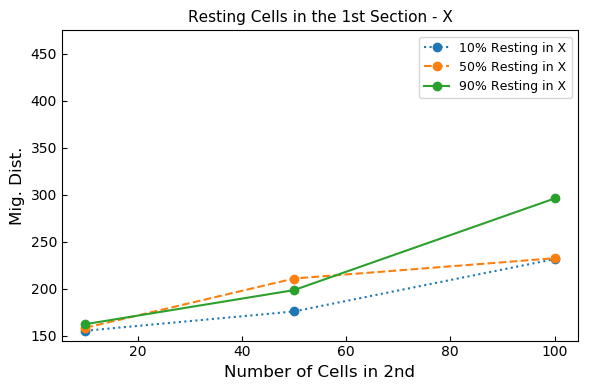

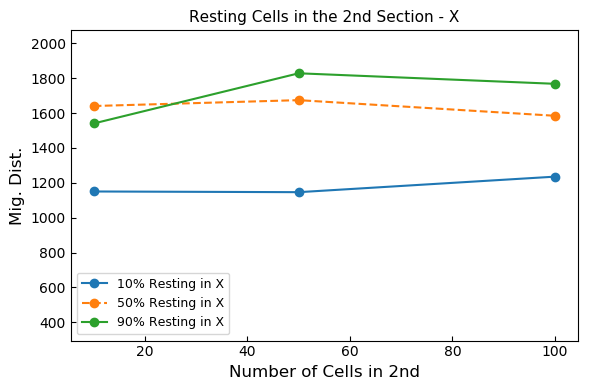

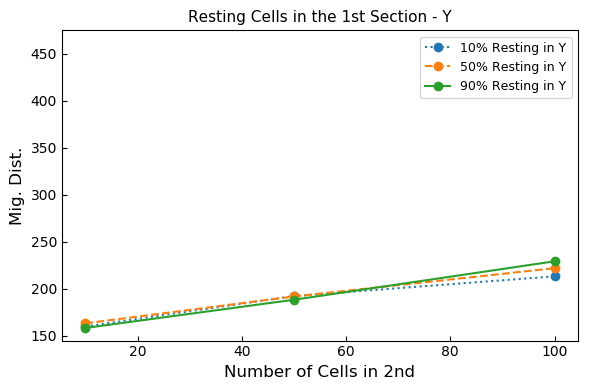

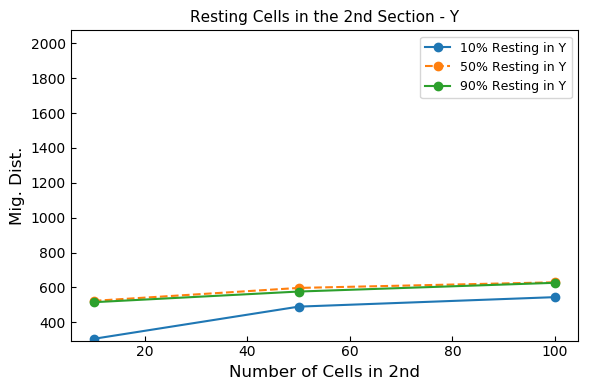

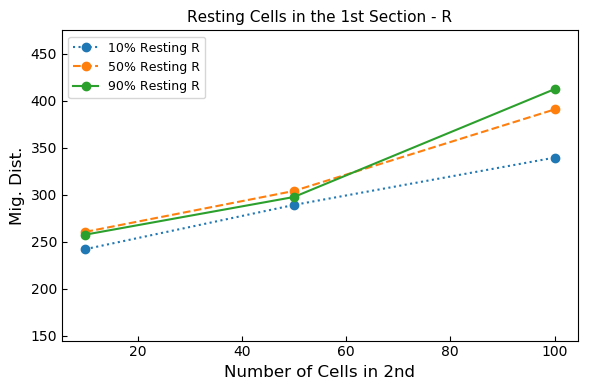

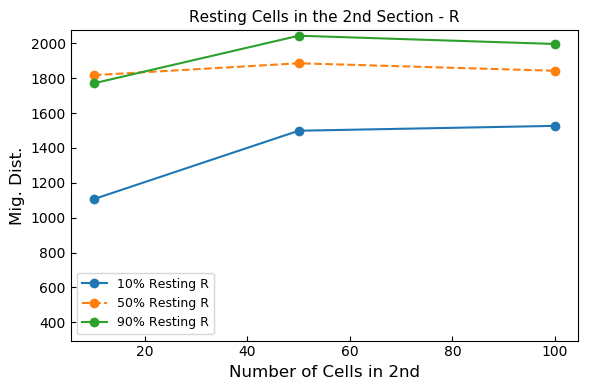

In [10]:
x = [int(10), int(50), int(100)]
y1xa = [data_avg1a[name[0]][0],data_avg1a[name[1]][0],data_avg1a[name[2]][0]]
y1ya = [data_avg1a[name[0]][1],data_avg1a[name[1]][1],data_avg1a[name[2]][1]]
y1ra =[data_avg1a[name[0]][2],data_avg1a[name[1]][2],data_avg1a[name[2]][2]]

y2xa = [data_avg2a[name[0]][0],data_avg2a[name[1]][0],data_avg2a[name[2]][0]]
y2ya = [data_avg2a[name[0]][1],data_avg2a[name[1]][1],data_avg2a[name[2]][1]]
y2ra =[data_avg2a[name[0]][2],data_avg2a[name[1]][2],data_avg2a[name[2]][2]]

y1xb = [data_avg1b[name[0]][0],data_avg1b[name[1]][0],data_avg1b[name[2]][0]]
y1yb = [data_avg1b[name[0]][1],data_avg1b[name[1]][1],data_avg1b[name[2]][1]]
y1rb =[data_avg1b[name[0]][2],data_avg1b[name[1]][2],data_avg1b[name[2]][2]]

y2xb = [data_avg2b[name[0]][0],data_avg2b[name[1]][0],data_avg2b[name[2]][0]]
y2yb = [data_avg2b[name[0]][1],data_avg2b[name[1]][1],data_avg2b[name[2]][1]]
y2rb =[data_avg2b[name[0]][2],data_avg2b[name[1]][2],data_avg2b[name[2]][2]]

y1xc = [data_avg1c[name[0]][0],data_avg1c[name[1]][0],data_avg1c[name[2]][0]]
y1yc = [data_avg1c[name[0]][1],data_avg1c[name[1]][1],data_avg1c[name[2]][1]]
y1rc =[data_avg1c[name[0]][2],data_avg1c[name[1]][2],data_avg1c[name[2]][2]]

y2xc = [data_avg2c[name[0]][0],data_avg2c[name[1]][0],data_avg2c[name[2]][0]]
y2yc = [data_avg2c[name[0]][1],data_avg2c[name[1]][1],data_avg2c[name[2]][1]]
y2rc =[data_avg2c[name[0]][2],data_avg2c[name[1]][2],data_avg2c[name[2]][2]]

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Resting Cells in the 1st Section - X',fontsize=11)
plt.plot(x,y1xa,'o:',label='10% Resting in X')
plt.plot(x,y1xb,'o--',label='50% Resting in X')
plt.plot(x,y1xc,'o-',label='90% Resting in X')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
plt.ylim([145,475])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Resting Cells in the 2nd Section - X',fontsize=11)
plt.plot(x,y2xa,'o-',label='10% Resting in X')
plt.plot(x,y2xb,'o--',label='50% Resting in X')
plt.plot(x,y2xc,'o-',label='90% Resting in X')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
plt.ylim([295,2075])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Resting Cells in the 1st Section - Y',fontsize=11)
plt.plot(x,y1ya,'o:',label='10% Resting in Y')
plt.plot(x,y1yb,'o--',label='50% Resting in Y')
plt.plot(x,y1yc,'o-',label='90% Resting in Y')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
plt.ylim([145,475])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Resting Cells in the 2nd Section - Y',fontsize=11)
plt.plot(x,y2ya,'o-',label='10% Resting in Y')
plt.plot(x,y2yb,'o--',label='50% Resting in Y')
plt.plot(x,y2yc,'o-',label='90% Resting in Y')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
plt.ylim([295,2075])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Resting Cells in the 1st Section - R',fontsize=11)
plt.plot(x,y1ra,'o:',label='10% Resting R')
plt.plot(x,y1rb,'o--',label='50% Resting R')
plt.plot(x,y1rc,'o-',label='90% Resting R')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
plt.ylim([145,475])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=100)
plt.tick_params(direction='in',labelsize=10)
plt.title('Resting Cells in the 2nd Section - R',fontsize=11)
plt.plot(x,y2ra,'o-',label='10% Resting R')
plt.plot(x,y2rb,'o--',label='50% Resting R')
plt.plot(x,y2rc,'o-',label='90% Resting R')
plt.xlabel('Number of Cells in 2nd',fontsize=12)
plt.ylabel('Mig. Dist.',fontsize=12)
plt.ylim([295,2075])
plt.legend(loc=0,fontsize=9)
plt.tight_layout()

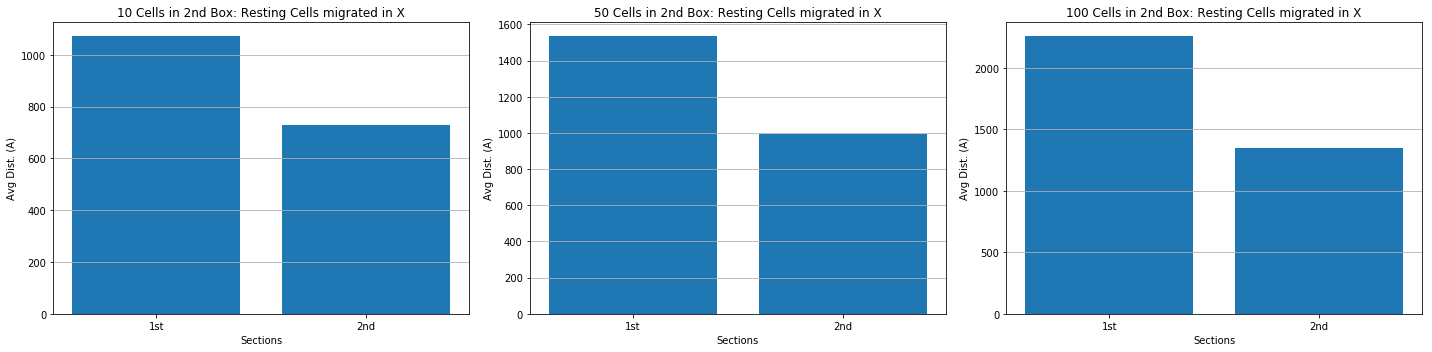

In [5]:
celltype = 'Resting Cells'
axis = 'X'
j = 0 
fig, axrr = plt.subplots(1,3, figsize=(20, 5), facecolor='w', edgecolor='k')
axrr = axrr.ravel()
n = 0
for i in np.arange(subseries):
    ax = axrr[n]
    data = [data_rmsd1[name[i]][j],data_rmsd2[name[i]][j]]
    direction = ['1st','2nd']
    x_pos = np.arange(len(data))

    ax.bar(x_pos, data,  align='center', alpha=1, ecolor='black', capsize=10)
    ax.set_ylabel('Avg Dist. (A)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(direction)
    ax.set_xlabel('Sections')
    ax.yaxis.grid(True)
    ax.set_title(name[i]+' Cells in 2nd Box: '+celltype+' migrated in '+axis)
    #ax.set_ylim([0,350])
    n += 1
    
plt.tight_layout()
plt.show()

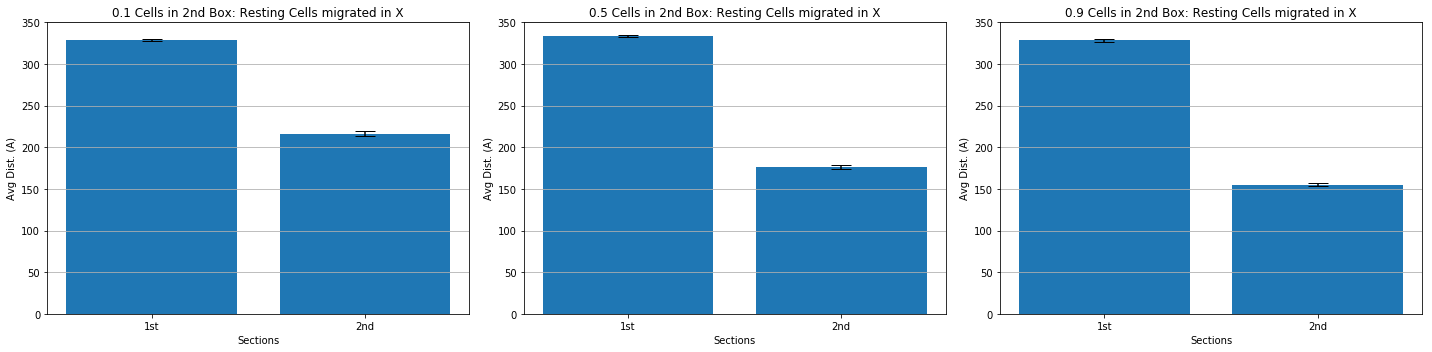

In [9]:
celltype = 'Resting Cells'
axis = 'X'
j = 0 
fig, axrr = plt.subplots(1,3, figsize=(20, 5), facecolor='w', edgecolor='k')
axrr = axrr.ravel()
n = 0
for i in np.arange(series):
    ax = axrr[n]
    data = [data_avg1[name[i]][j],data_avg2[name[i]][j]]
    err = [data_sem1[name[i]][j],data_sem2[name[i]][j]]
    direction = ['1st','2nd']
    x_pos = np.arange(len(data))

    ax.bar(x_pos, data, yerr=err, align='center', alpha=1, ecolor='black', capsize=10)
    ax.set_ylabel('Avg Dist. (A)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(direction)
    ax.set_xlabel('Sections')
    ax.yaxis.grid(True)
    ax.set_title(name[i]+' Cells in 2nd Box: '+celltype+' migrated in '+axis)
    ax.set_ylim([0,350])
    n += 1
    
plt.tight_layout()
plt.show()

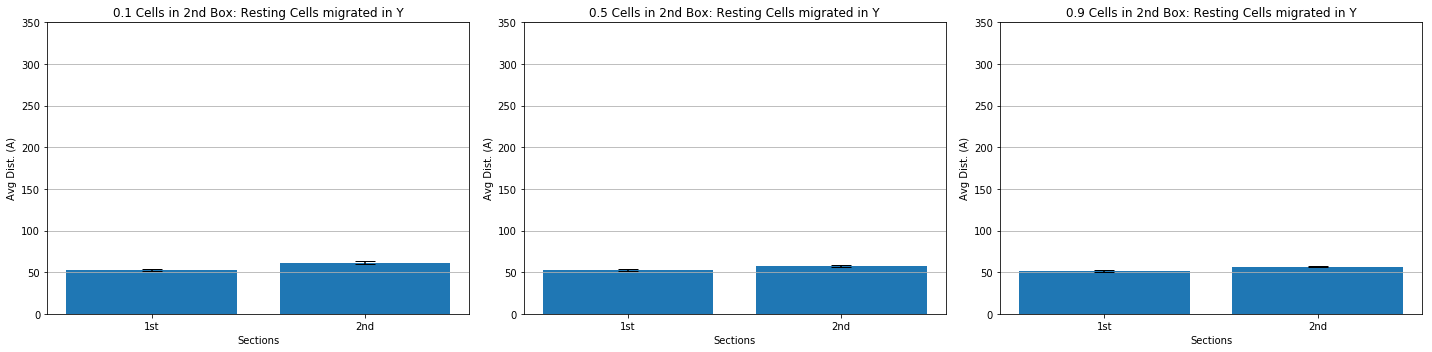

In [10]:
celltype = 'Resting Cells'
axis = 'Y'
j = 1 
fig, axrr = plt.subplots(1,3, figsize=(20, 5), facecolor='w', edgecolor='k')
axrr = axrr.ravel()
n = 0
for i in np.arange(series):
    ax = axrr[n]
    data = [data_avg1[name[i]][j],data_avg2[name[i]][j]]
    err = [data_sem1[name[i]][j],data_sem2[name[i]][j]]
    direction = ['1st','2nd']
    x_pos = np.arange(len(data))

    ax.bar(x_pos, data, yerr=err, align='center', alpha=1, ecolor='black', capsize=10)
    ax.set_ylabel('Avg Dist. (A)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(direction)
    ax.set_xlabel('Sections')
    ax.yaxis.grid(True)
    ax.set_title(name[i]+' Cells in 2nd Box: '+celltype+' migrated in '+axis)
    ax.set_ylim([0,350])
    n += 1
    
plt.tight_layout()
plt.show()

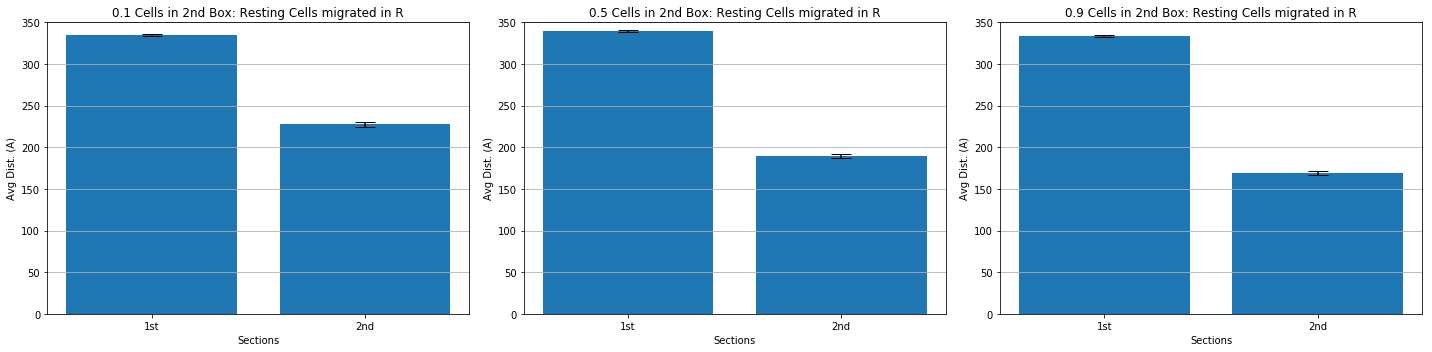

In [11]:
celltype = 'Resting Cells'
axis = 'R'
j = 2 
fig, axrr = plt.subplots(1,3, figsize=(20, 5), facecolor='w', edgecolor='k')
axrr = axrr.ravel()
n = 0
for i in np.arange(series):
    ax = axrr[n]
    data = [data_avg1[name[i]][j],data_avg2[name[i]][j]]
    err = [data_sem1[name[i]][j],data_sem2[name[i]][j]]
    direction = ['1st','2nd']
    x_pos = np.arange(len(data))

    ax.bar(x_pos, data, yerr=err, align='center', alpha=1, ecolor='black', capsize=10)
    ax.set_ylabel('Avg Dist. (A)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(direction)
    ax.set_xlabel('Sections')
    ax.yaxis.grid(True)
    ax.set_title(name[i]+' Cells in 2nd Box: '+celltype+' migrated in '+axis)
    ax.set_ylim([0,350])
    n += 1
    
plt.tight_layout()
plt.show()

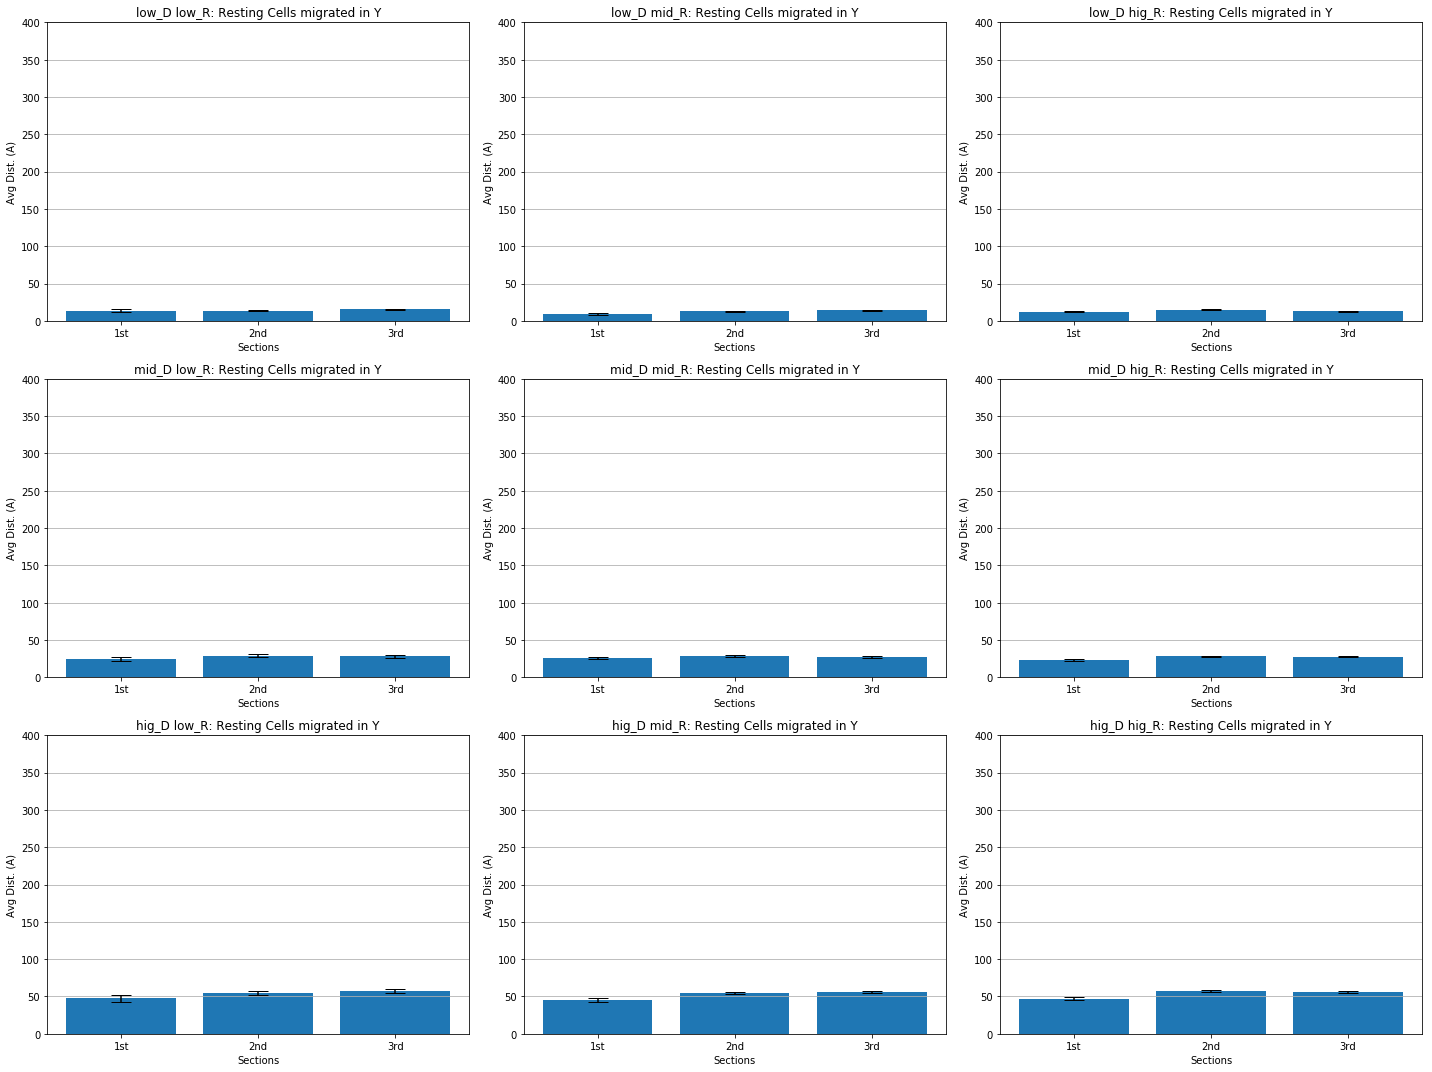

In [58]:
celltype = 'Resting Cells'
axis = 'Y'
j = 1 
fig, axrr = plt.subplots(3,3, figsize=(20, 15), facecolor='w', edgecolor='k')
axrr = axrr.ravel()
n = 0
for i in np.arange(9):
    ax = axrr[n]
    data = [data_avg1[name[i]][j],data_avg2[name[i]][j],data_avg3[name[i]][j]]
    err = [data_sem1[name[i]][j],data_sem2[name[i]][j],data_sem3[name[i]][j]]
    direction = ['1st','2nd','3rd']
    x_pos = np.arange(len(data))

    ax.bar(x_pos, data, yerr=err, align='center', alpha=1, ecolor='black', capsize=10)
    ax.set_ylabel('Avg Dist. (A)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(direction)
    ax.set_xlabel('Sections')
    ax.yaxis.grid(True)
    ax.set_title(name[i]+': '+celltype+' migrated in '+axis)
    ax.set_ylim([0,400])
    n += 1
    
plt.tight_layout()
plt.show()

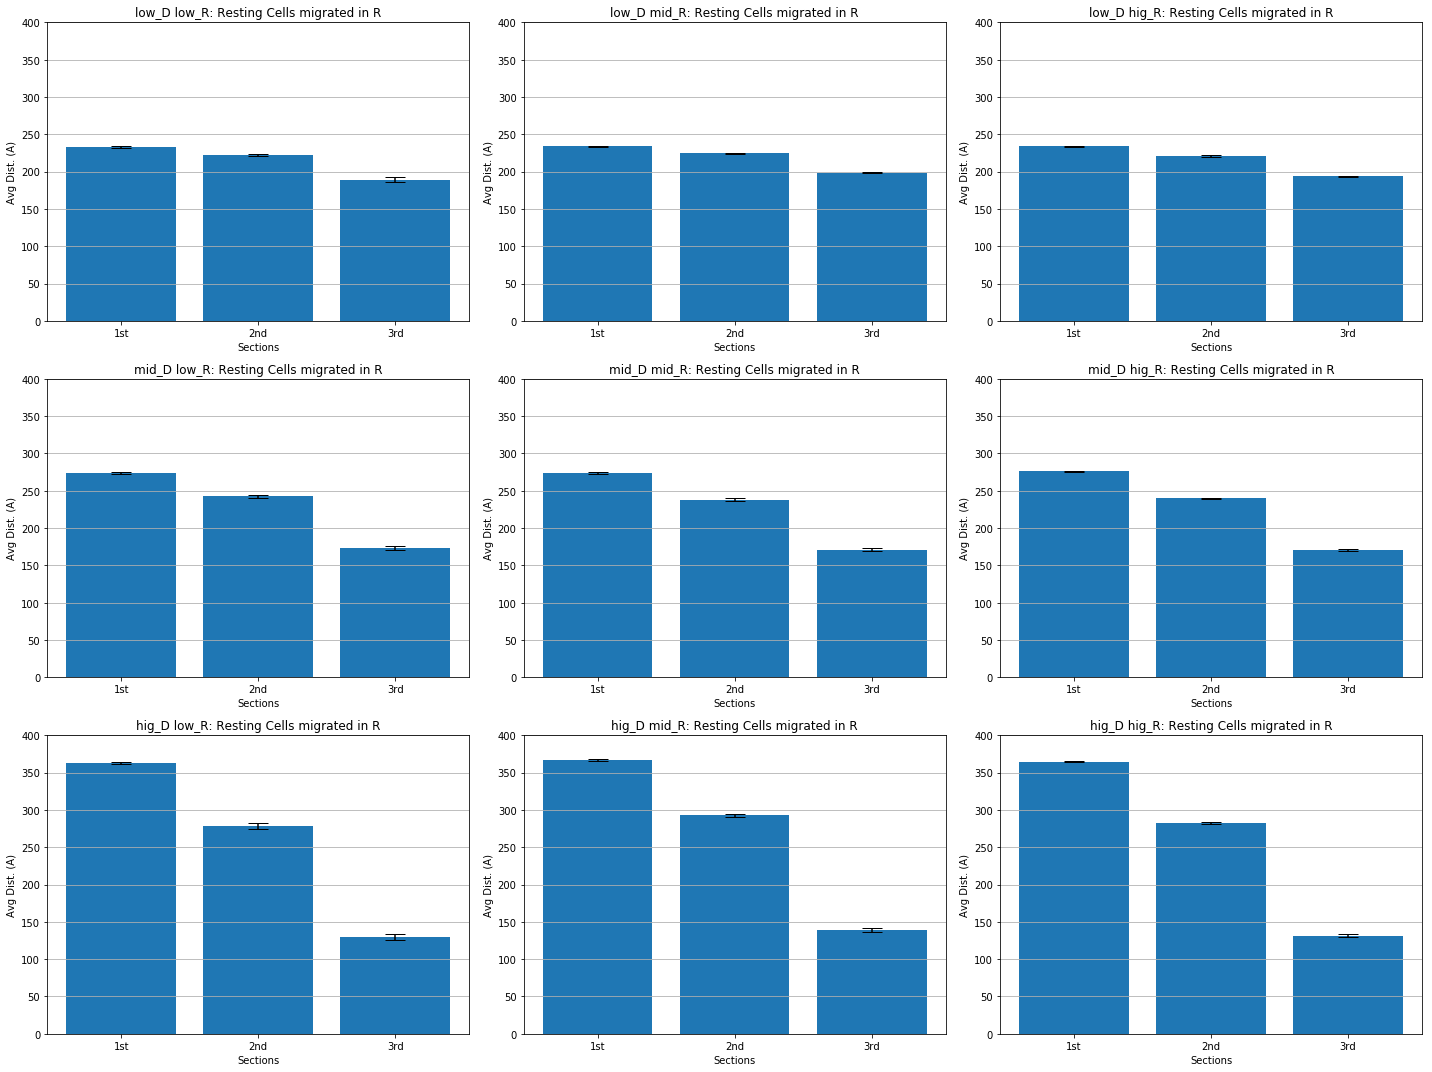

In [59]:
celltype = 'Resting Cells'
axis = 'R'
j = 2 
fig, axrr = plt.subplots(3,3, figsize=(20, 15), facecolor='w', edgecolor='k')
axrr = axrr.ravel()
n = 0
for i in np.arange(9):
    ax = axrr[n]
    data = [data_avg1[name[i]][j],data_avg2[name[i]][j],data_avg3[name[i]][j]]
    err = [data_sem1[name[i]][j],data_sem2[name[i]][j],data_sem3[name[i]][j]]
    direction = ['1st','2nd','3rd']
    x_pos = np.arange(len(data))

    ax.bar(x_pos, data, yerr=err, align='center', alpha=1, ecolor='black', capsize=10)
    ax.set_ylabel('Avg Dist. (A)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(direction)
    ax.set_xlabel('Sections')
    ax.yaxis.grid(True)
    ax.set_title(name[i]+': '+celltype+' migrated in '+axis)
    ax.set_ylim([0,400])
    n += 1
    
plt.tight_layout()
plt.show()

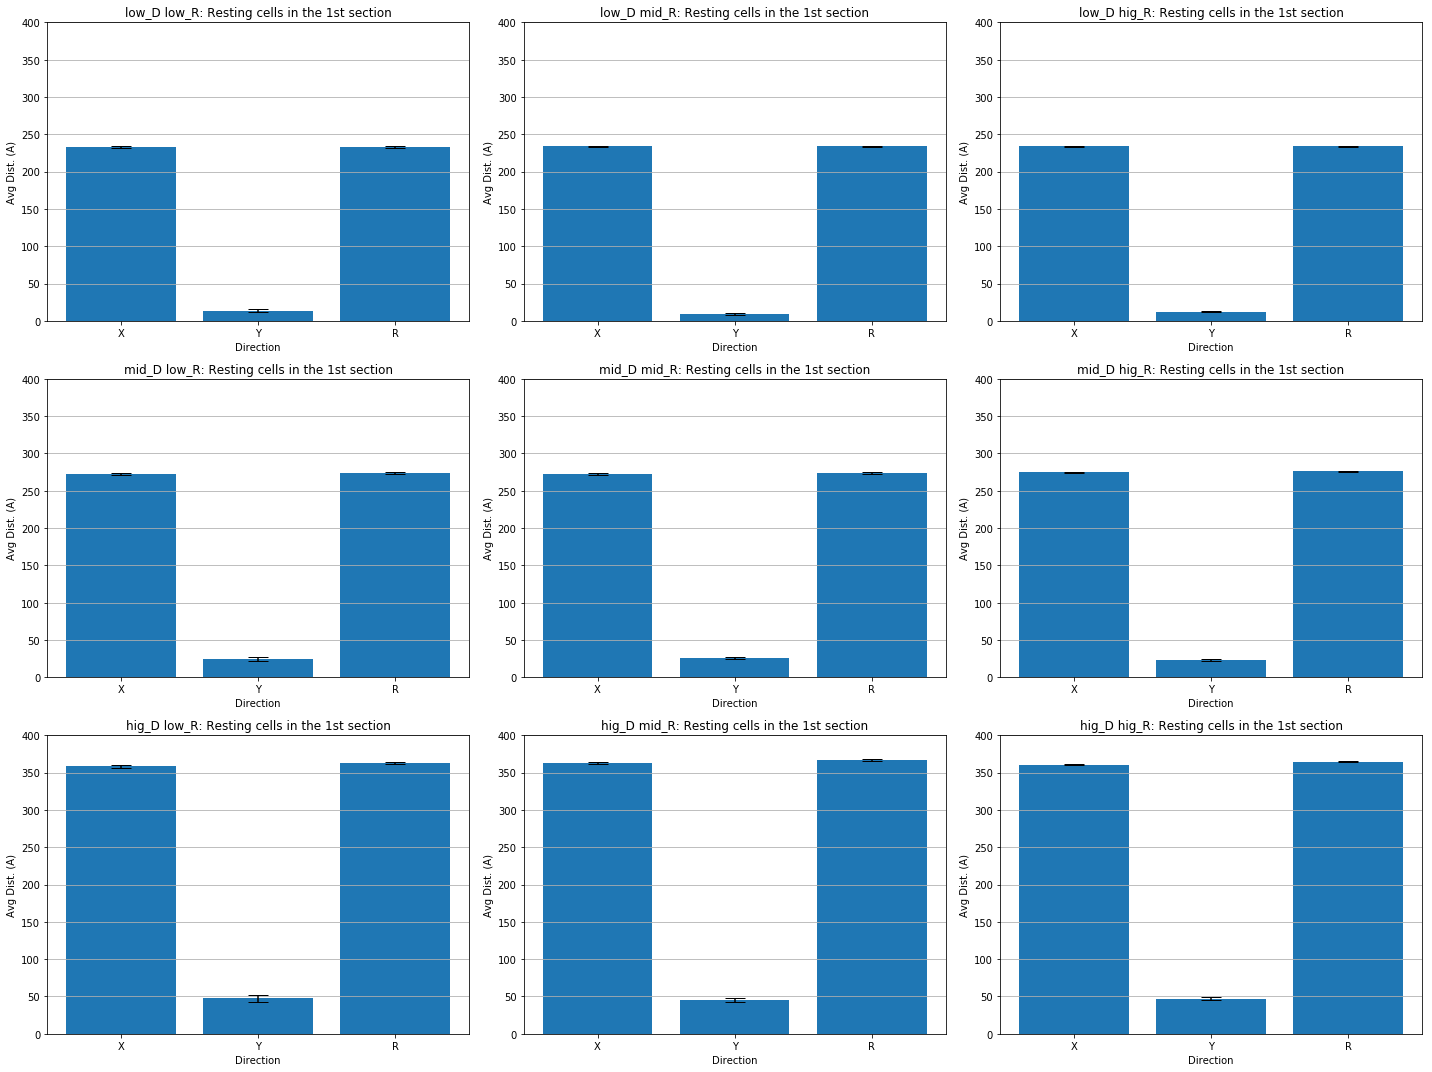

In [62]:
fig, axrr = plt.subplots(3,3, figsize=(20, 15), facecolor='w', edgecolor='k')
axrr = axrr.ravel()
for i in np.arange(9):
    ax = axrr[i]
    data = data_avg1[name[i]]
    err = data_sem1[name[i]]
    direction = ['X','Y','R']
    x_pos = np.arange(len(data))
    ax.bar(x_pos, data, yerr=err, align='center', alpha=1, ecolor='black', capsize=10)
    ax.set_ylabel('Avg Dist. (A)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(direction)
    ax.set_xlabel('Direction')
    ax.yaxis.grid(True)
    ax.set_title(name[i]+': Resting cells in the 1st section')
    ax.set_ylim([0,400])
plt.tight_layout()
plt.show()

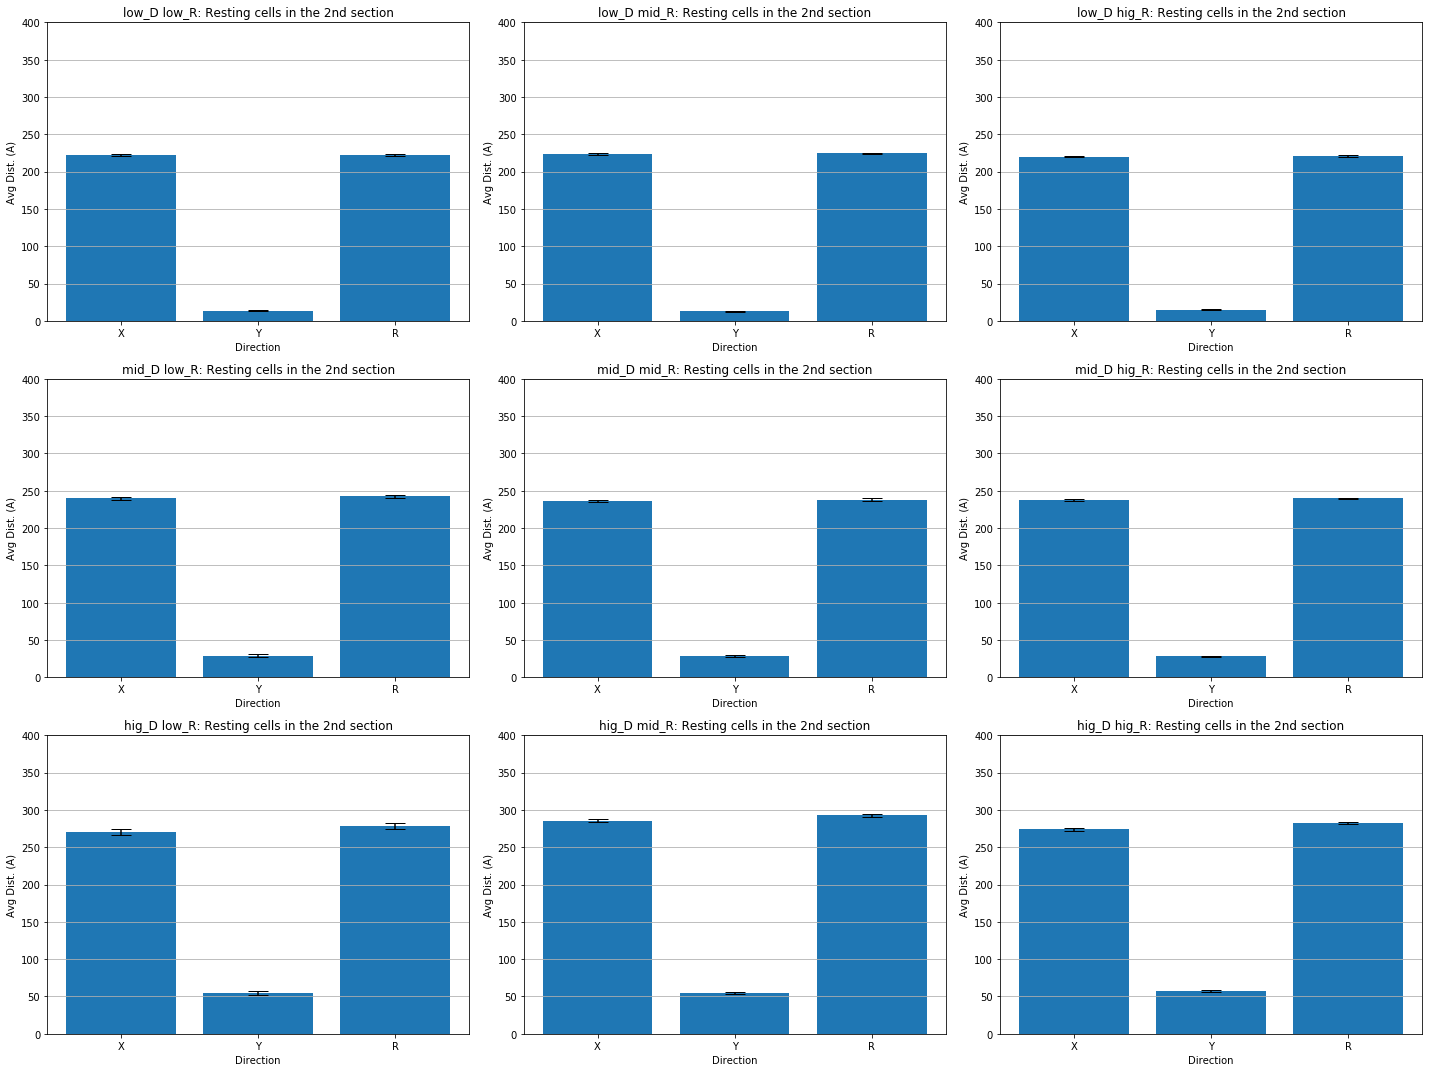

In [63]:
fig, axrr = plt.subplots(3,3, figsize=(20, 15), facecolor='w', edgecolor='k')
axrr = axrr.ravel()
for i in np.arange(9):
    ax = axrr[i]
    data = data_avg2[name[i]]
    err = data_sem2[name[i]]
    direction = ['X','Y','R']
    x_pos = np.arange(len(data))
    ax.bar(x_pos, data, yerr=err, align='center', alpha=1, ecolor='black', capsize=10)
    ax.set_ylabel('Avg Dist. (A)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(direction)
    ax.set_xlabel('Direction')
    ax.yaxis.grid(True)
    ax.set_title(name[i]+': Resting cells in the 2nd section')
    ax.set_ylim([0,400])
plt.tight_layout()
plt.show()

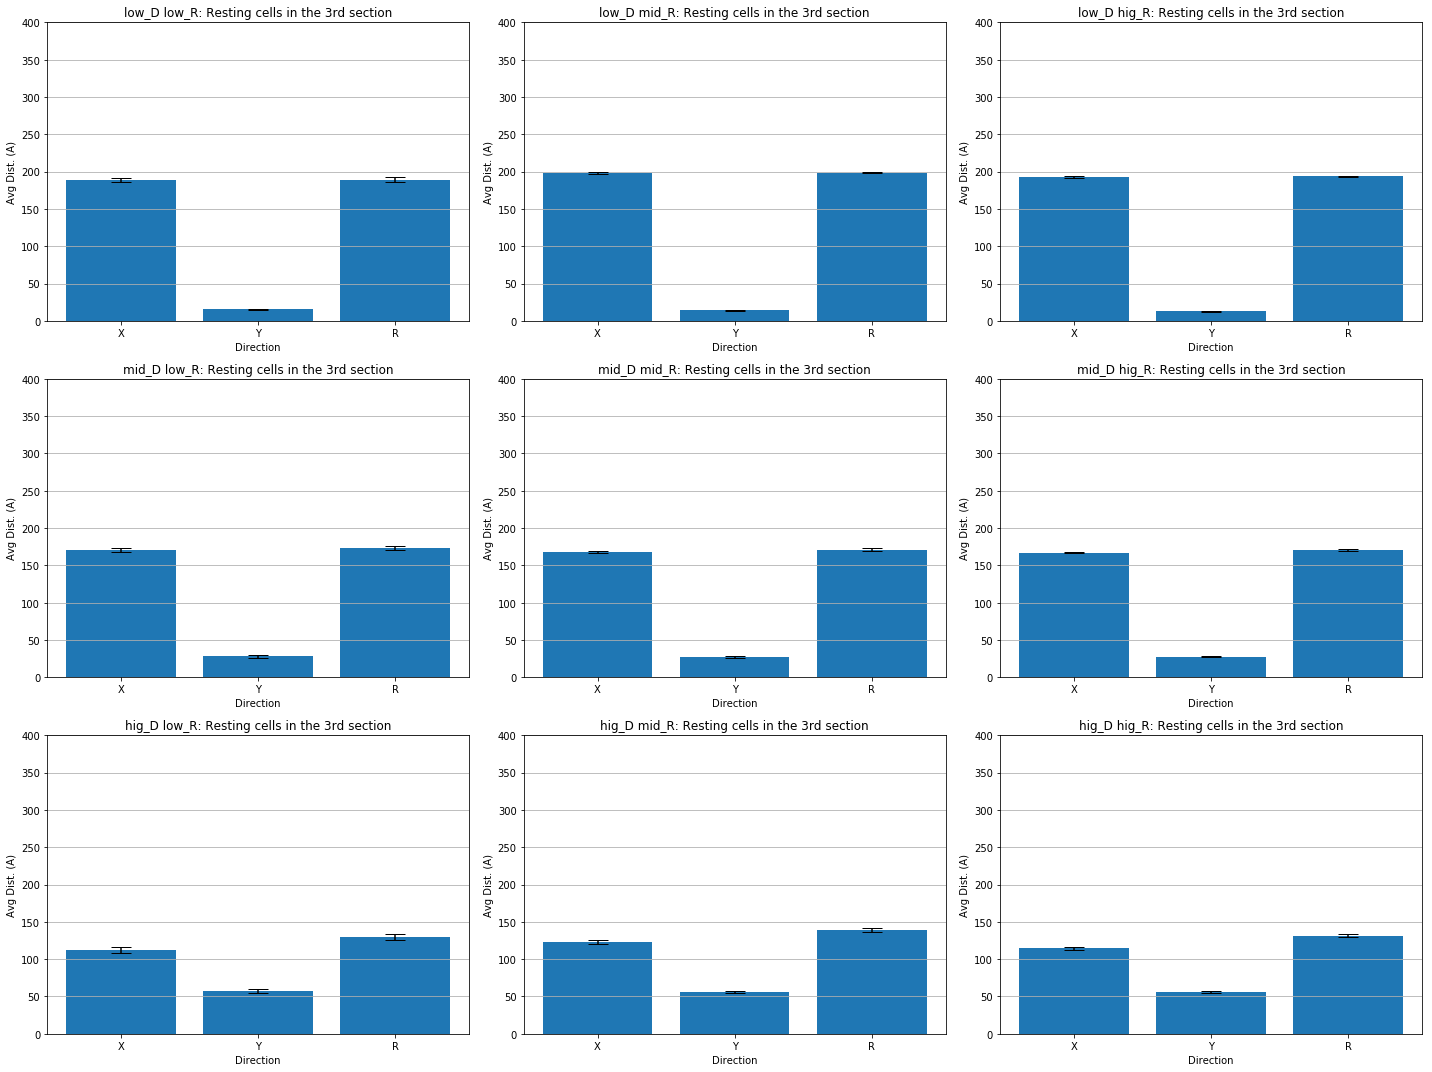

In [64]:
fig, axrr = plt.subplots(3,3, figsize=(20, 15), facecolor='w', edgecolor='k')
axrr = axrr.ravel()
for i in np.arange(9):
    ax = axrr[i]
    data = data_avg3[name[i]]
    err = data_sem3[name[i]]
    direction = ['X','Y','R']
    x_pos = np.arange(len(data))
    ax.bar(x_pos, data, yerr=err, align='center', alpha=1, ecolor='black', capsize=10)
    ax.set_ylabel('Avg Dist. (A)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(direction)
    ax.set_xlabel('Direction')
    ax.yaxis.grid(True)
    ax.set_title(name[i]+': Resting cells in the 3rd section')
    ax.set_ylim([0,400])
plt.tight_layout()
plt.show()

In [37]:
series = 9
name = ['low_D low_R',
        'low_D mid_R',
        'low_D hig_R',
        'mid_D low_R',
        'mid_D mid_R',
        'mid_D hig_R',
        'hig_D low_R',
        'hig_D mid_R',
        'hig_D hig_R']

section = ['first','second','third']

data_avg1 = {}
data_std1 = {}
data_sem1 = {}

data_avg2 = {}
data_std2 = {}
data_sem2 = {}

data_avg3 = {}
data_std3 = {}
data_sem3 = {}

data_sortedx = {}
data_sortedy = {}
data_sortedr = {}

data_avgx = {} 
data_avgy = {} 
data_avgr = {} 

data_stdx = {} 
data_stdy = {} 
data_stdr = {}

data_semx = {} 
data_semy = {} 
data_semr = {}

for i in np.arange(9):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(20):
        data = csvread('test_r'+str(1)+'_'+str(i+1+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            data_sortedx[name[i]].append(float(x[n]))
            data_sortedy[name[i]].append(float(y[n]))
            data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    
    data_avg1[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std1[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem1[name[i]] = [data_semx, data_semy, data_semr]
    
for i in np.arange(9):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(20):
        data = csvread('test_a'+str(2)+'_'+str(i+1+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            data_sortedx[name[i]].append(float(x[n]))
            data_sortedy[name[i]].append(float(y[n]))
            data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    
    data_avg2[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std2[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem2[name[i]] = [data_semx, data_semy, data_semr]
    
for i in np.arange(9):
    data_sortedx[name[i]] = []
    data_sortedy[name[i]] = []
    data_sortedr[name[i]] = []
    for j in np.arange(20):
        data = csvread('test_r'+str(3)+'_'+str(i+1+series*j))
        x = data['x']
        y = data['y']
        r = data['r']
        num = len(data['count'])
        for n in np.arange(num):
            data_sortedx[name[i]].append(float(x[n]))
            data_sortedy[name[i]].append(float(y[n]))
            data_sortedr[name[i]].append(float(r[n]))
                
    # averaging
    data_avgx = np.mean(data_sortedx[name[i]])
    data_avgy = np.mean(data_sortedy[name[i]])
    data_avgr = np.mean(data_sortedr[name[i]])
    # std
    data_stdx = np.std(data_sortedx[name[i]])
    data_stdy = np.std(data_sortedy[name[i]])
    data_stdr = np.std(data_sortedr[name[i]])
    # sem
    data_semx = np.std(data_sortedx[name[i]])/np.sqrt(len(data_sortedx[name[i]]))
    data_semy = np.std(data_sortedy[name[i]])/np.sqrt(len(data_sortedy[name[i]]))
    data_semr = np.std(data_sortedr[name[i]])/np.sqrt(len(data_sortedr[name[i]]))
    
    data_avg3[name[i]] = [data_avgx, data_avgy, data_avgr]
    data_std3[name[i]] = [data_stdx, data_stdy, data_stdr]
    data_sem3[name[i]] = [data_semx, data_semy, data_semr]

In [38]:
print(data_avg1['low_D low_R'])

[232.75198078155518, 13.666169166564941, 233.28248461585167]


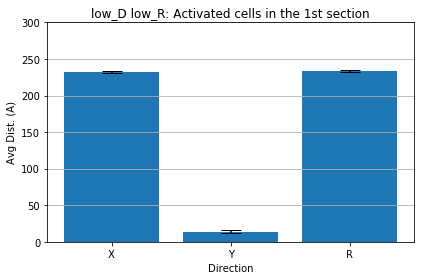

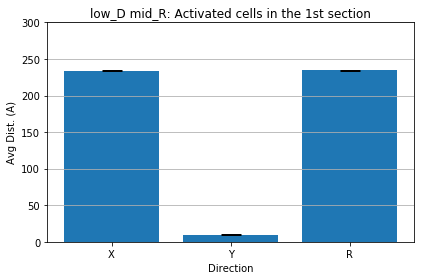

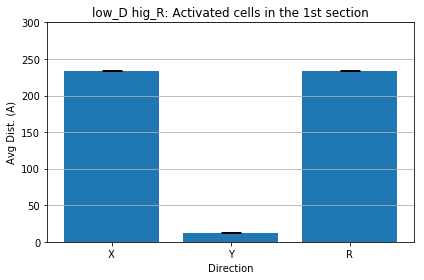

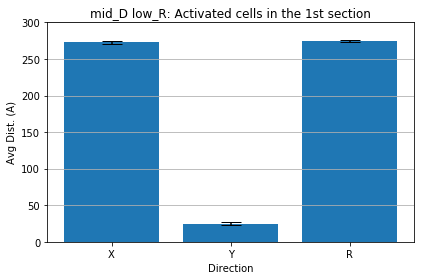

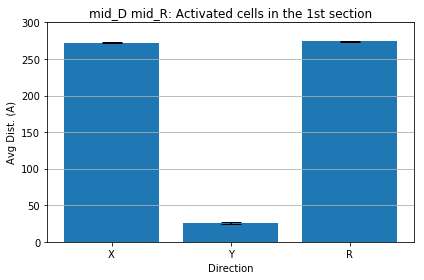

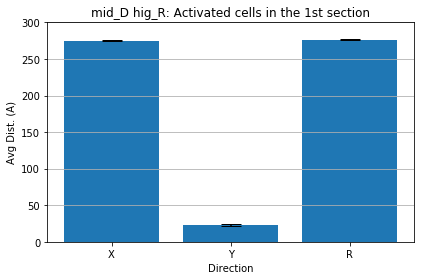

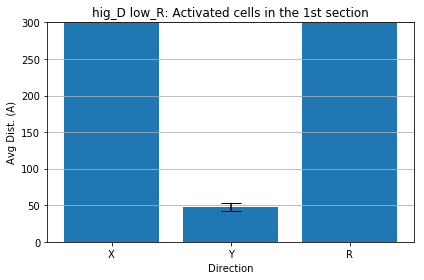

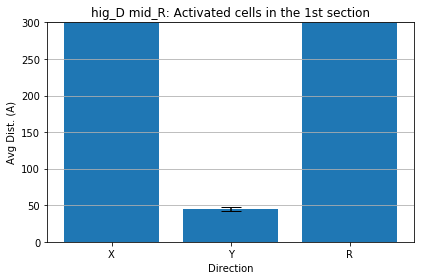

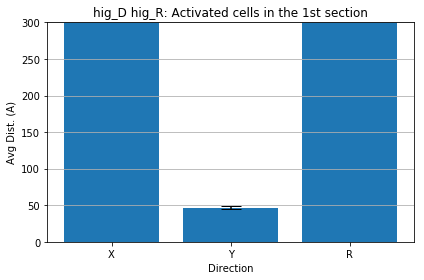

In [42]:
for i in np.arange(9):
    data = data_avg1[name[i]]
    err = data_sem1[name[i]]
    direction = ['X','Y','R']
    x_pos = np.arange(len(data))

    fig, ax = plt.subplots()
    ax.bar(x_pos, data, yerr=err, align='center', alpha=1, ecolor='black', capsize=10)
    ax.set_ylabel('Avg Dist. (A)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(direction)
    ax.set_xlabel('Direction')
    ax.yaxis.grid(True)
    ax.set_title(name[i]+': Activated cells in the 1st section')
    ax.set_ylim([0,300])
    plt.tight_layout()
    plt.show()

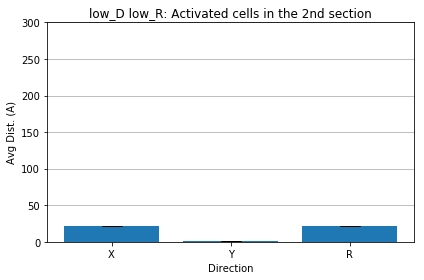

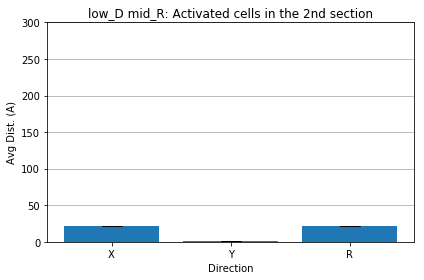

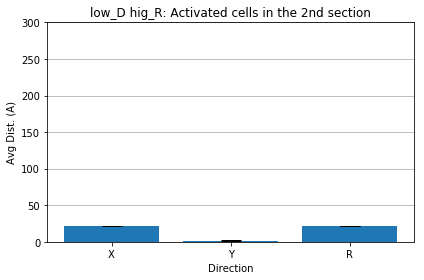

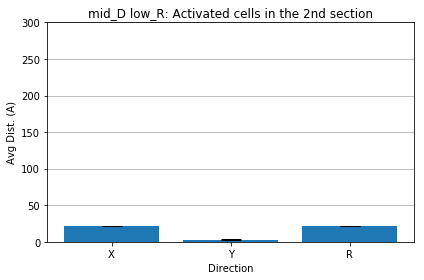

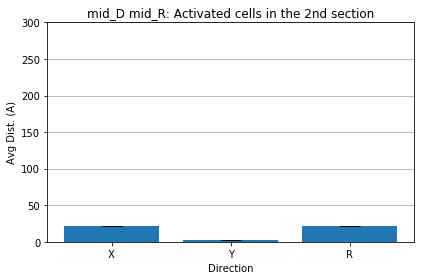

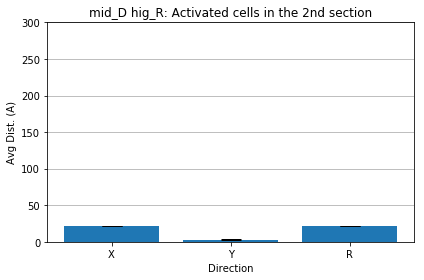

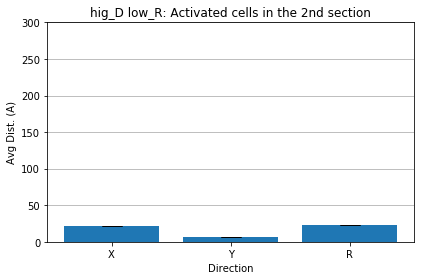

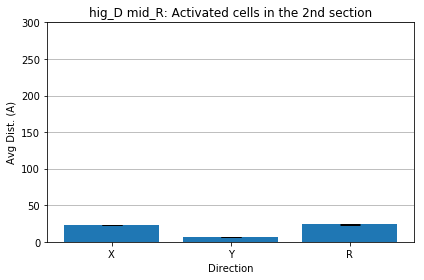

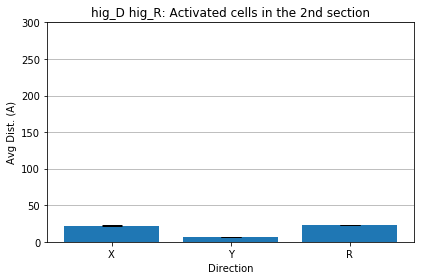

In [43]:
for i in np.arange(9):
    data = data_avg2[name[i]]
    err = data_sem2[name[i]]
    direction = ['X','Y','R']
    x_pos = np.arange(len(data))

    fig, ax = plt.subplots()
    ax.bar(x_pos, data, yerr=err, align='center', alpha=1, ecolor='black', capsize=10)
    ax.set_ylabel('Avg Dist. (A)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(direction)
    ax.set_xlabel('Direction')
    ax.yaxis.grid(True)
    ax.set_title(name[i]+': Activated cells in the 2nd section')
    ax.set_ylim([0,300])
    plt.tight_layout()
    plt.show()

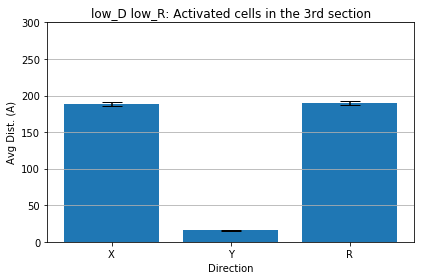

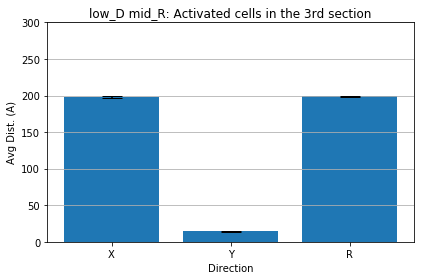

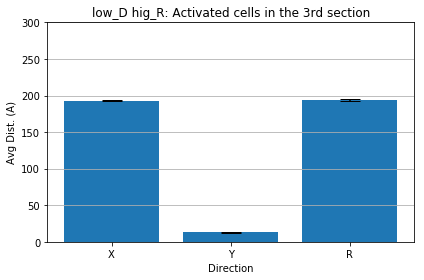

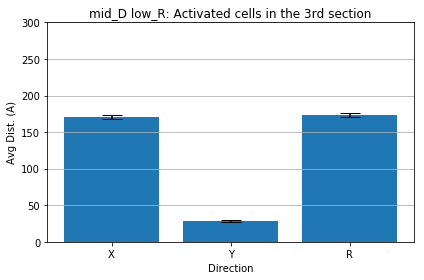

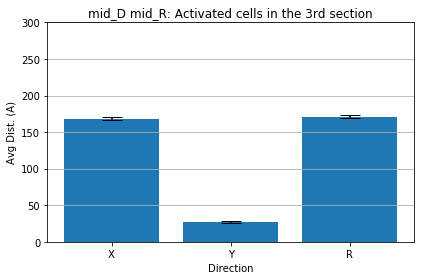

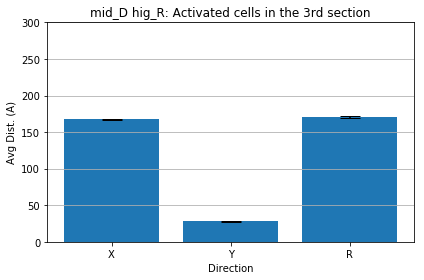

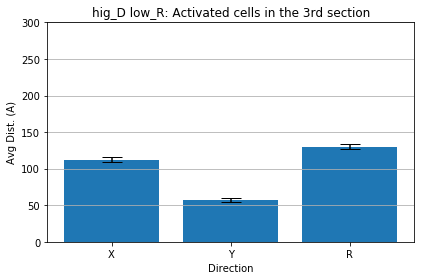

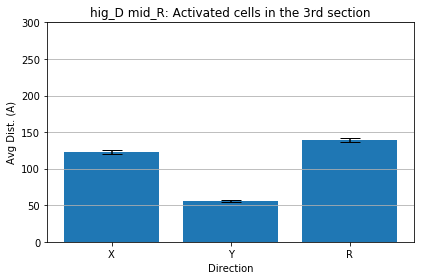

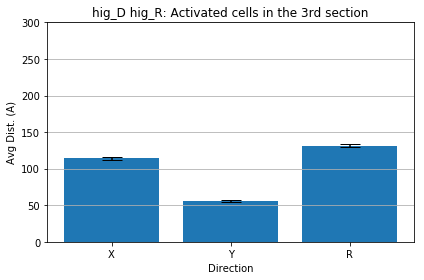

In [44]:
for i in np.arange(9):
    data = data_avg3[name[i]]
    err = data_sem3[name[i]]
    direction = ['X','Y','R']
    x_pos = np.arange(len(data))

    fig, ax = plt.subplots()
    ax.bar(x_pos, data, yerr=err, align='center', alpha=1, ecolor='black', capsize=10)
    ax.set_ylabel('Avg Dist. (A)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(direction)
    ax.set_xlabel('Direction')
    ax.yaxis.grid(True)
    ax.set_title(name[i]+': Activated cells in the 3rd section')
    ax.set_ylim([0,300])
    plt.tight_layout()
    plt.show()

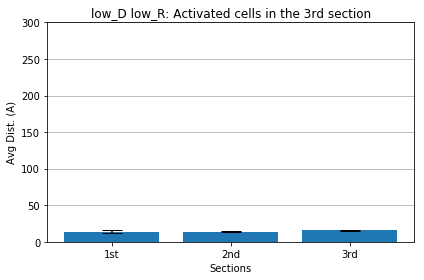

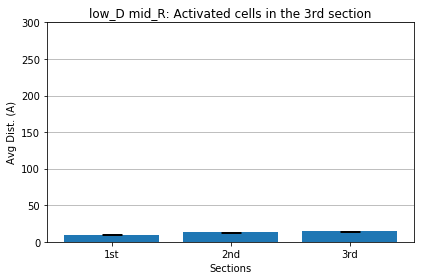

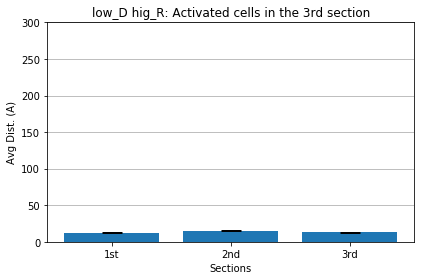

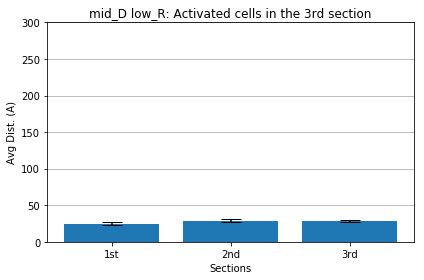

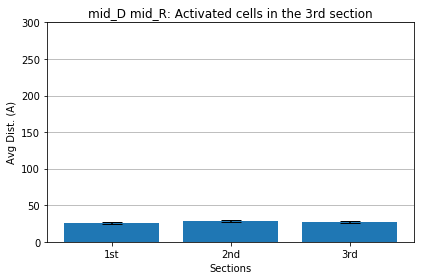

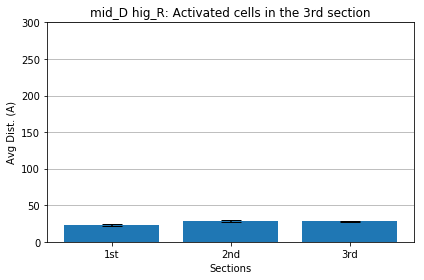

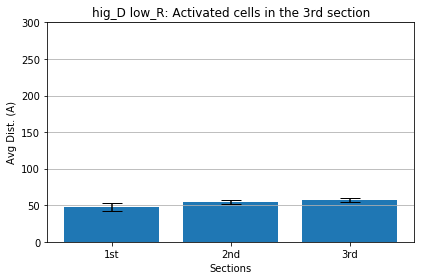

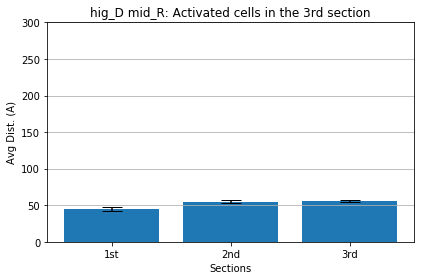

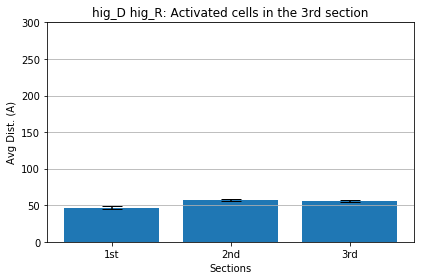

In [13]:
for i in np.arange(9):
    data = [data_avg1[name[i]][1],data_avg2[name[i]][1],data_avg3[name[i]][1]]

    err = [data_sem1[name[i]][1],data_sem2[name[i]][1],data_sem3[name[i]][1]]
    direction = ['1st','2nd','3rd']
    x_pos = np.arange(len(data))

    fig, ax = plt.subplots()
    ax.bar(x_pos, data, yerr=err, align='center', alpha=1, ecolor='black', capsize=10)
    ax.set_ylabel('Avg Dist. (A)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(direction)
    ax.set_xlabel('Sections')
    ax.yaxis.grid(True)
    ax.set_title(name[i]+': ')
    ax.set_ylim([0,300])
    plt.tight_layout()
    plt.show()